In [1]:
cd(@__DIR__)
include("table_reader.jl")
include("utils/Missing_values.jl")

truncate_MV (generic function with 1 method)

In [2]:
series=extract_series("TX_STAID000031.txt",plot=false)
series=truncate_MV(series,"TX")
years=unique(Dates.year.(series.DATE))

#Imputing missing values
# include("utils/Missing_values.jl")
# ImputeMissingValues!(series[!,2],series.DATE)
# N=length(series[!,2])

47-element Vector{Int64}:
 1957
 1958
 1959
 1960
 1961
 1962
 1963
 1964
 1965
 1966
    ⋮
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
 2003

## II. Series filtered by removing a smoothed average periodicity

In [3]:
include("utils/periodicity.jl")
Days_list=[[] for _ in 1:366]
for (i,temp) in enumerate(series[!,2])
    push!(Days_list[dayofyear_Leap(series.DATE[i])],temp)
end
avg_day=mean.(Days_list)
max_day=maximum.(Days_list)
df_month = @chain series begin
    @transform(:TEMP = series[!,2]) #Give a common name for TX, TN, etc...
    @transform(:MONTH = month.(:DATE)) #add month column
    @by(:MONTH, :MONTHLY_MEAN = mean(:TEMP), :MONTHLY_STD = std(:TEMP), :MONTHLY_MAX = maximum(:TEMP)) # grouby MONTH + takes the mean/std in each category 
end
f=RegularizationSmooth(mean.(Days_list), 1:366, 9)
periodicity=f.(dayofyear_Leap.(series.DATE))
x=series[!,2]-periodicity
period=f.(1:366)

366-element Vector{Float64}:
 1.253644016954628
 1.2370964025761013
 1.2163963386030165
 1.1936744593519513
 1.1706244050015804
 1.1485591801599748
 1.1284626651444334
 1.1110365427557318
 1.0967428963084258
 1.085842727658402
 ⋮
 1.1773904819908734
 1.1671266173151567
 1.1579717821983233
 1.1503959605709748
 1.1449403948175931
 1.1422221372429553
 1.142938531781087
 1.1478715958888503
 1.1578922710886121

## Segmenting the dataset by month

In [4]:
include("utils/Separation.jl")
Monthly_date=MonthlySeparateDates(series.DATE)
Monthly_temp=MonthlySeparateX(x,series.DATE)

12-element Vector{Vector{AbstractVector}}:
 [[0.026355983045372344, 0.16290359742389882, 0.28360366139698345, 0.016325540648048698, 0.12937559499841966, 0.29144081984002534, 0.28153733485556676, -0.11103654275573183, -0.30674289630842577, -0.005842727658401881  …  -0.5053984183915857, -0.5799922118719116, -0.26432038435463245, 0.0018450068783908424, -0.321304184240253, -0.10361260542795137, 0.05503898405485175, 0.04473479101143907, 0.01552564490127395, 0.027431131835583322], [0.2463559830453721, -0.2070964025761013, -0.2663963386030165, -0.07367445935195138, -0.36062440500158033, -0.048559180159974735, 0.20153733485556669, 0.13896345724426817, -0.4767428963084257, -0.48584272765840186  …  0.34460158160841425, 0.5200077881280885, 0.36567961564536744, -0.008154993121608944, 0.16869581575974713, 0.026387394572048528, 0.20503898405485188, 0.04473479101143907, 0.035525644901273745, -0.15256886816441684], [0.14635598304537223, 0.35290359742389876, 0.3636036613969835, 0.5063255406480489, 0.54

## Autocorrelations

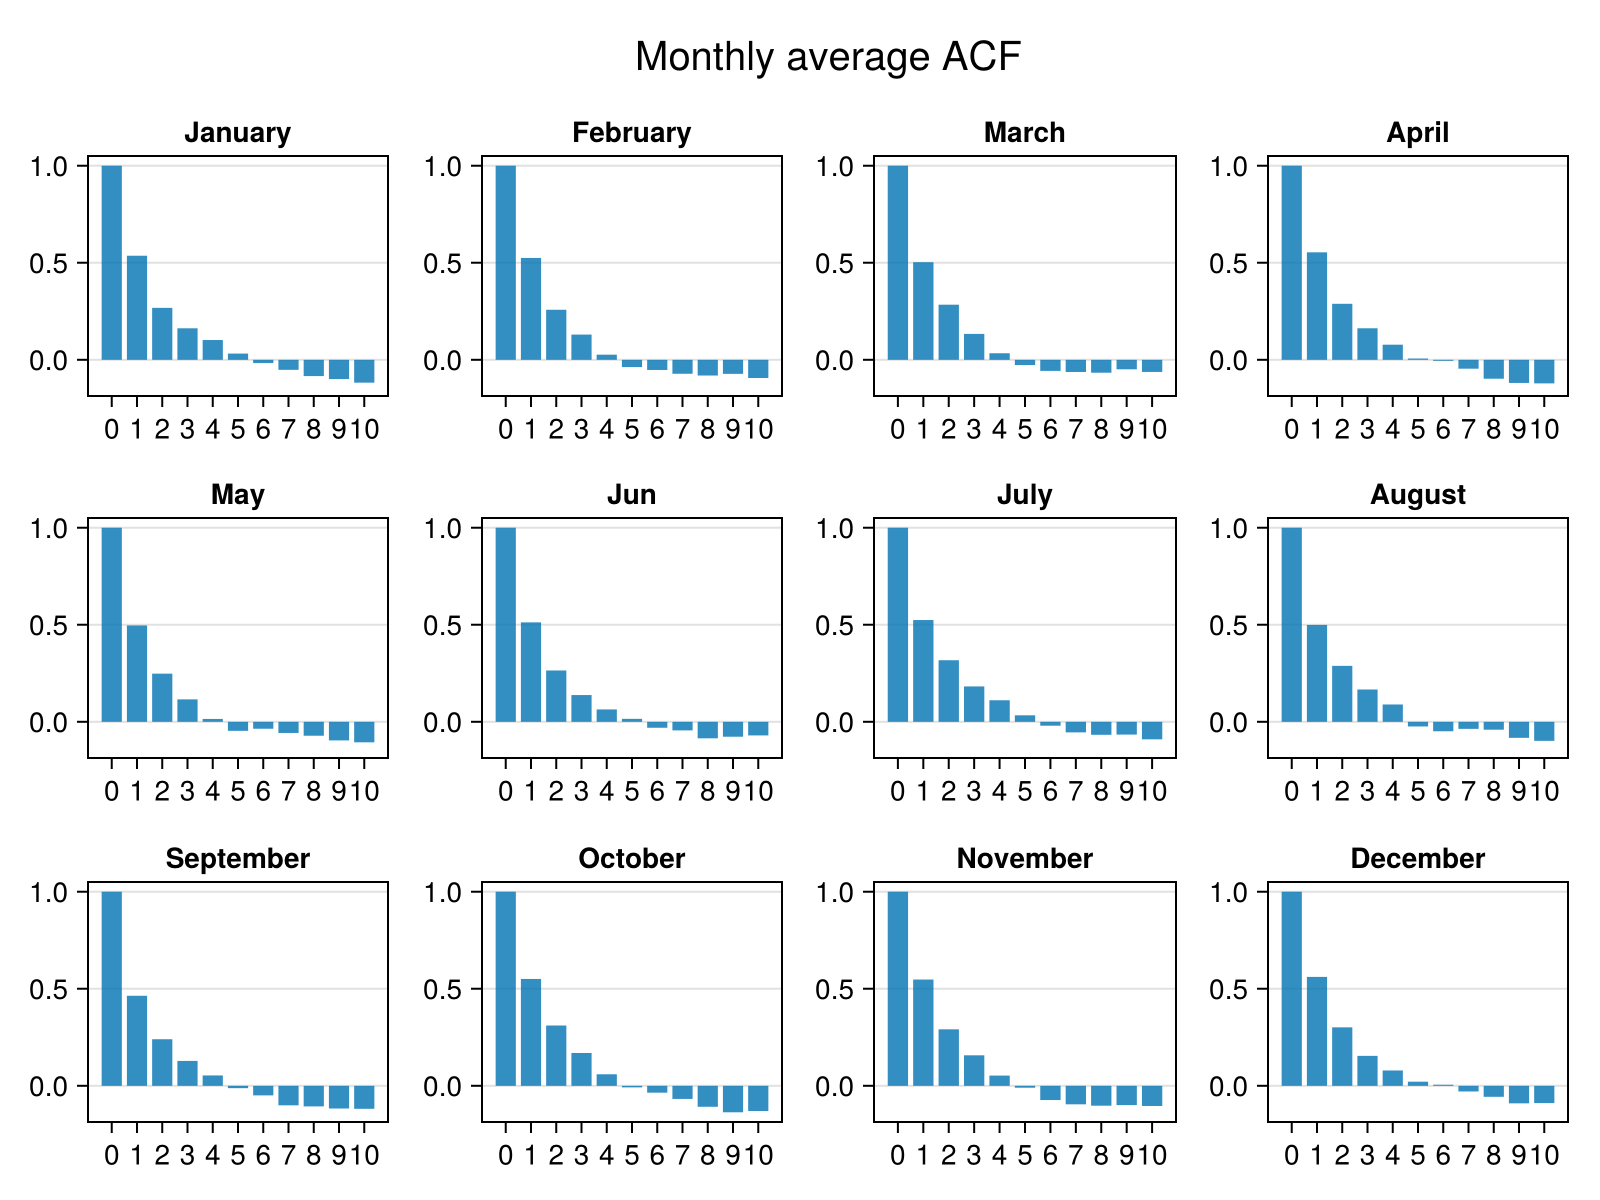

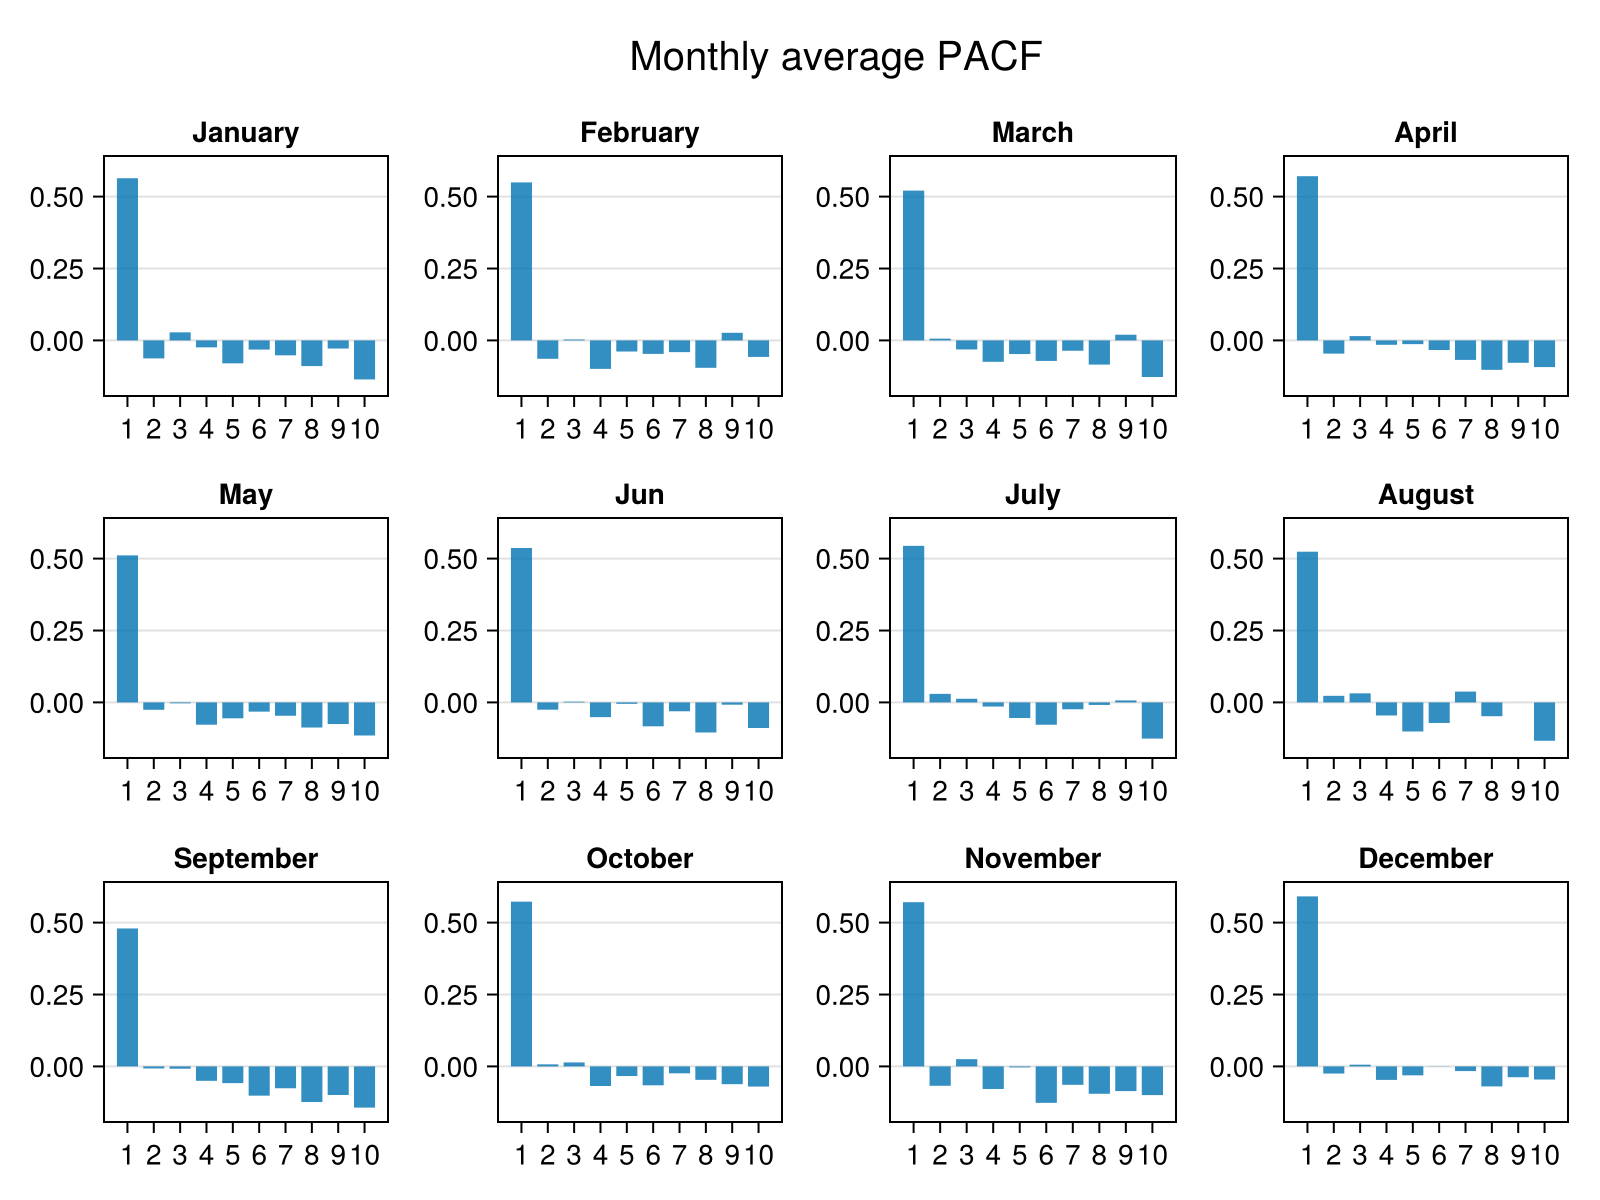

CairoMakie.Screen{IMAGE}


In [5]:
include("utils/ACF_PACF.jl")
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

For each month, it still looks like an AR(1) model

# Estimation AR(1)

## Estimation

ERROR: LoadError: too many parameters for type AbstractInterpolation
Stacktrace:
 [1] top-level scope
   @ C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:28
 [2] include
   @ .\Base.jl:557 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2881
 [4] top-level scope
   @ stdin:6
in expression starting at C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:3
in expression starting at stdin:6
┌ Error: Error during loading of extension SparseConnectivityTracerDataInterpolationsExt of SparseConnectivityTracer, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile SparseConnectivityTracerDataInterpolationsExt [

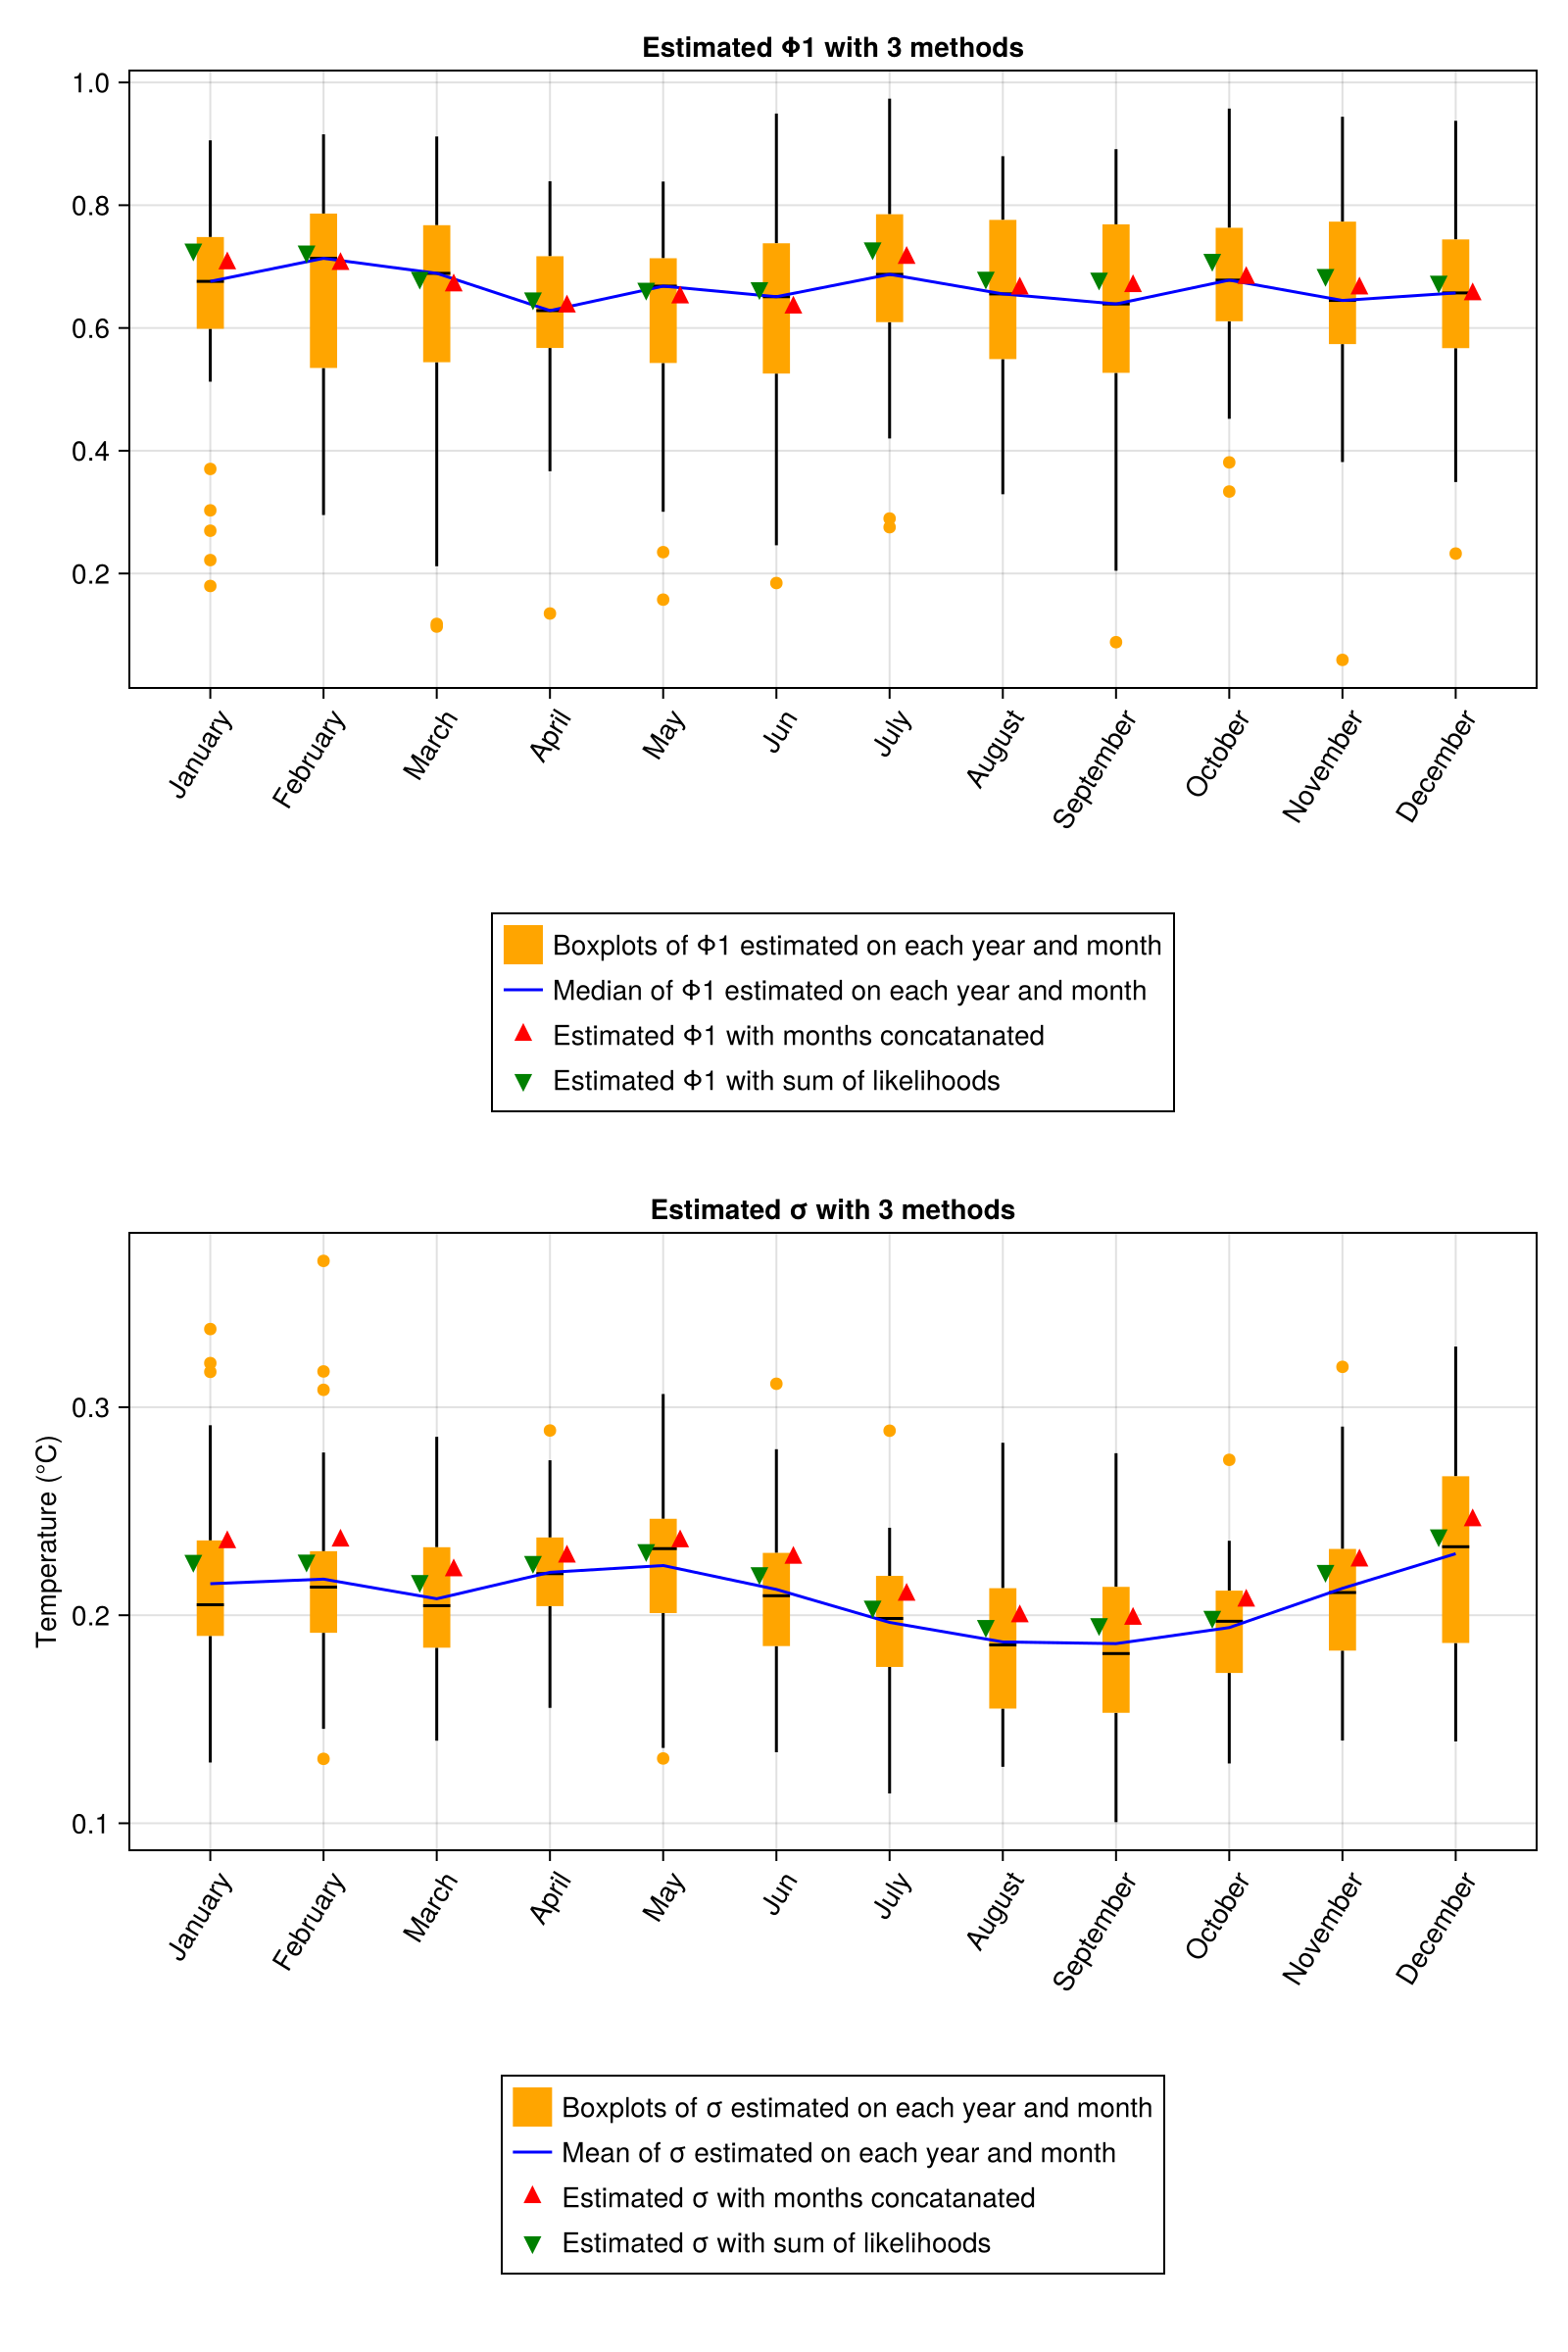

CairoMakie.Screen{IMAGE}


In [6]:
include(raw"utils\Estimation.jl")
Params, figure= AllEstimation(Monthly_temp, lineplot=true)
display(figure)

## Simulation

### With estimation on each month

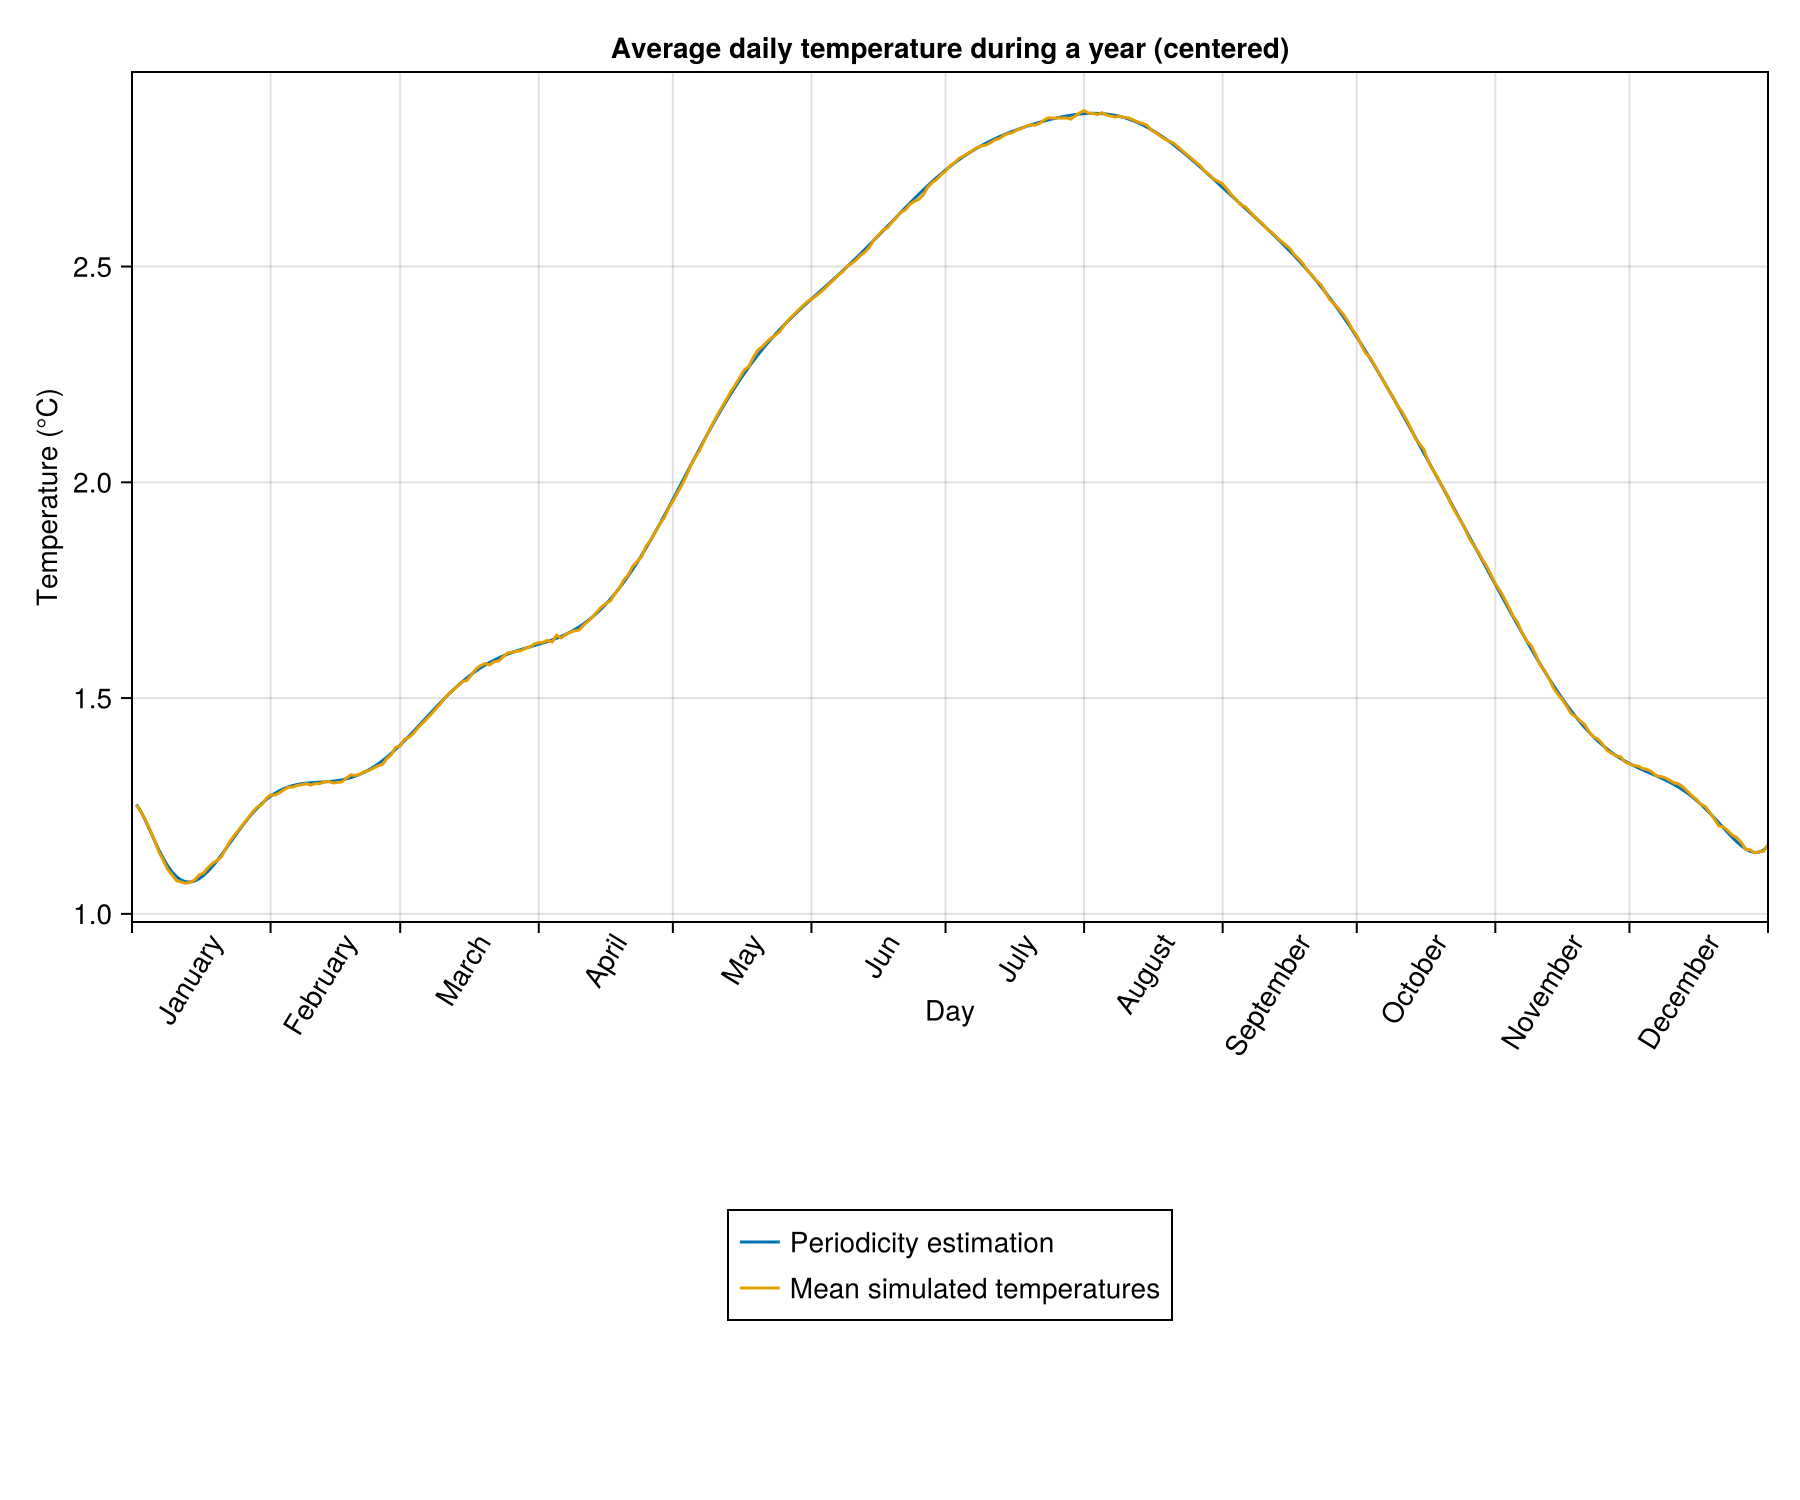

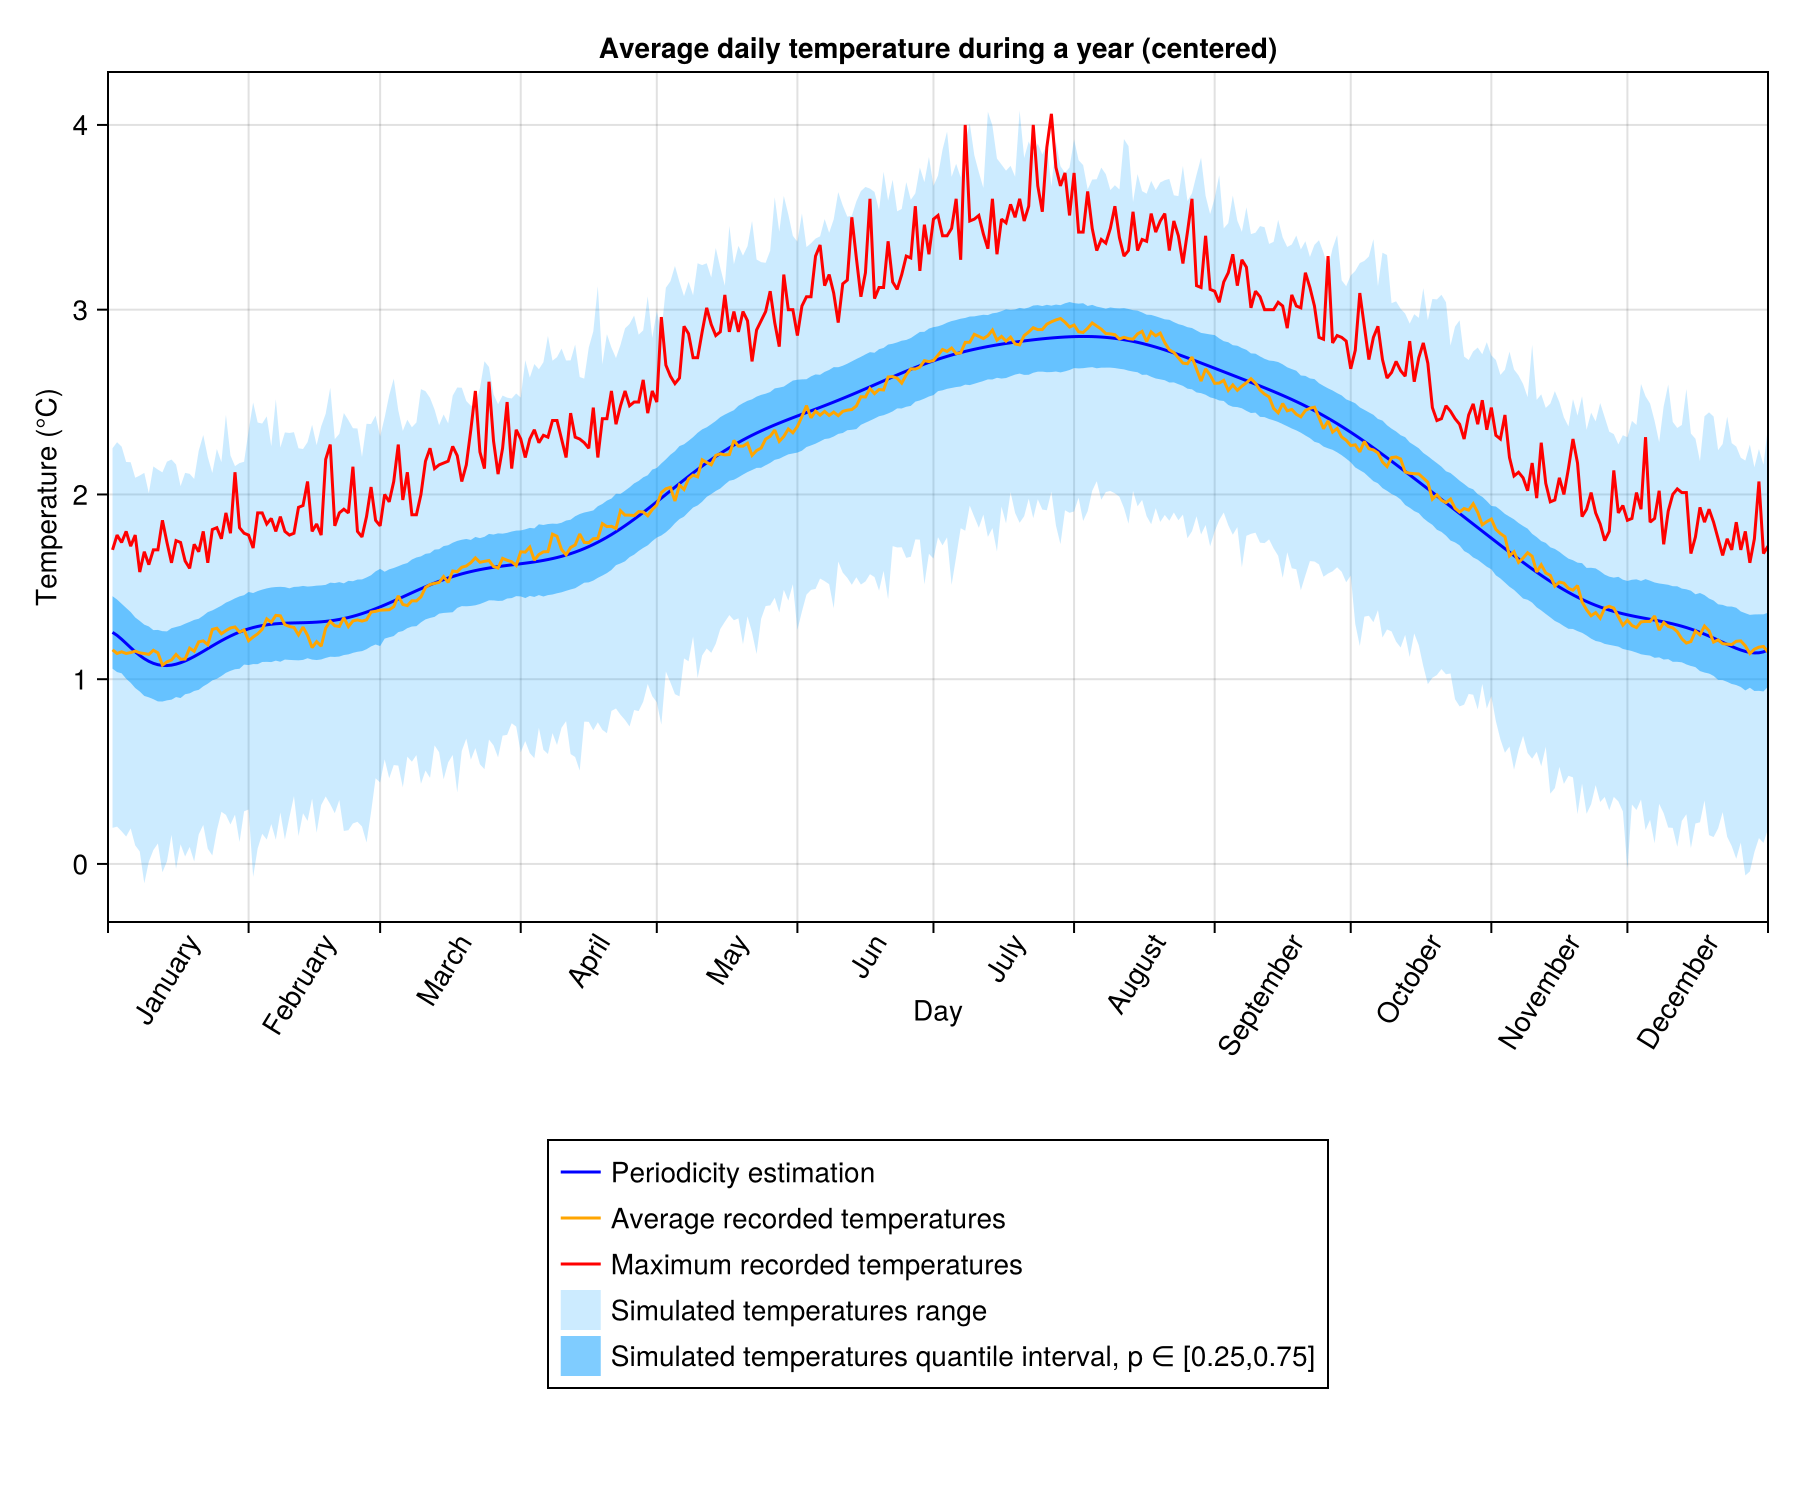

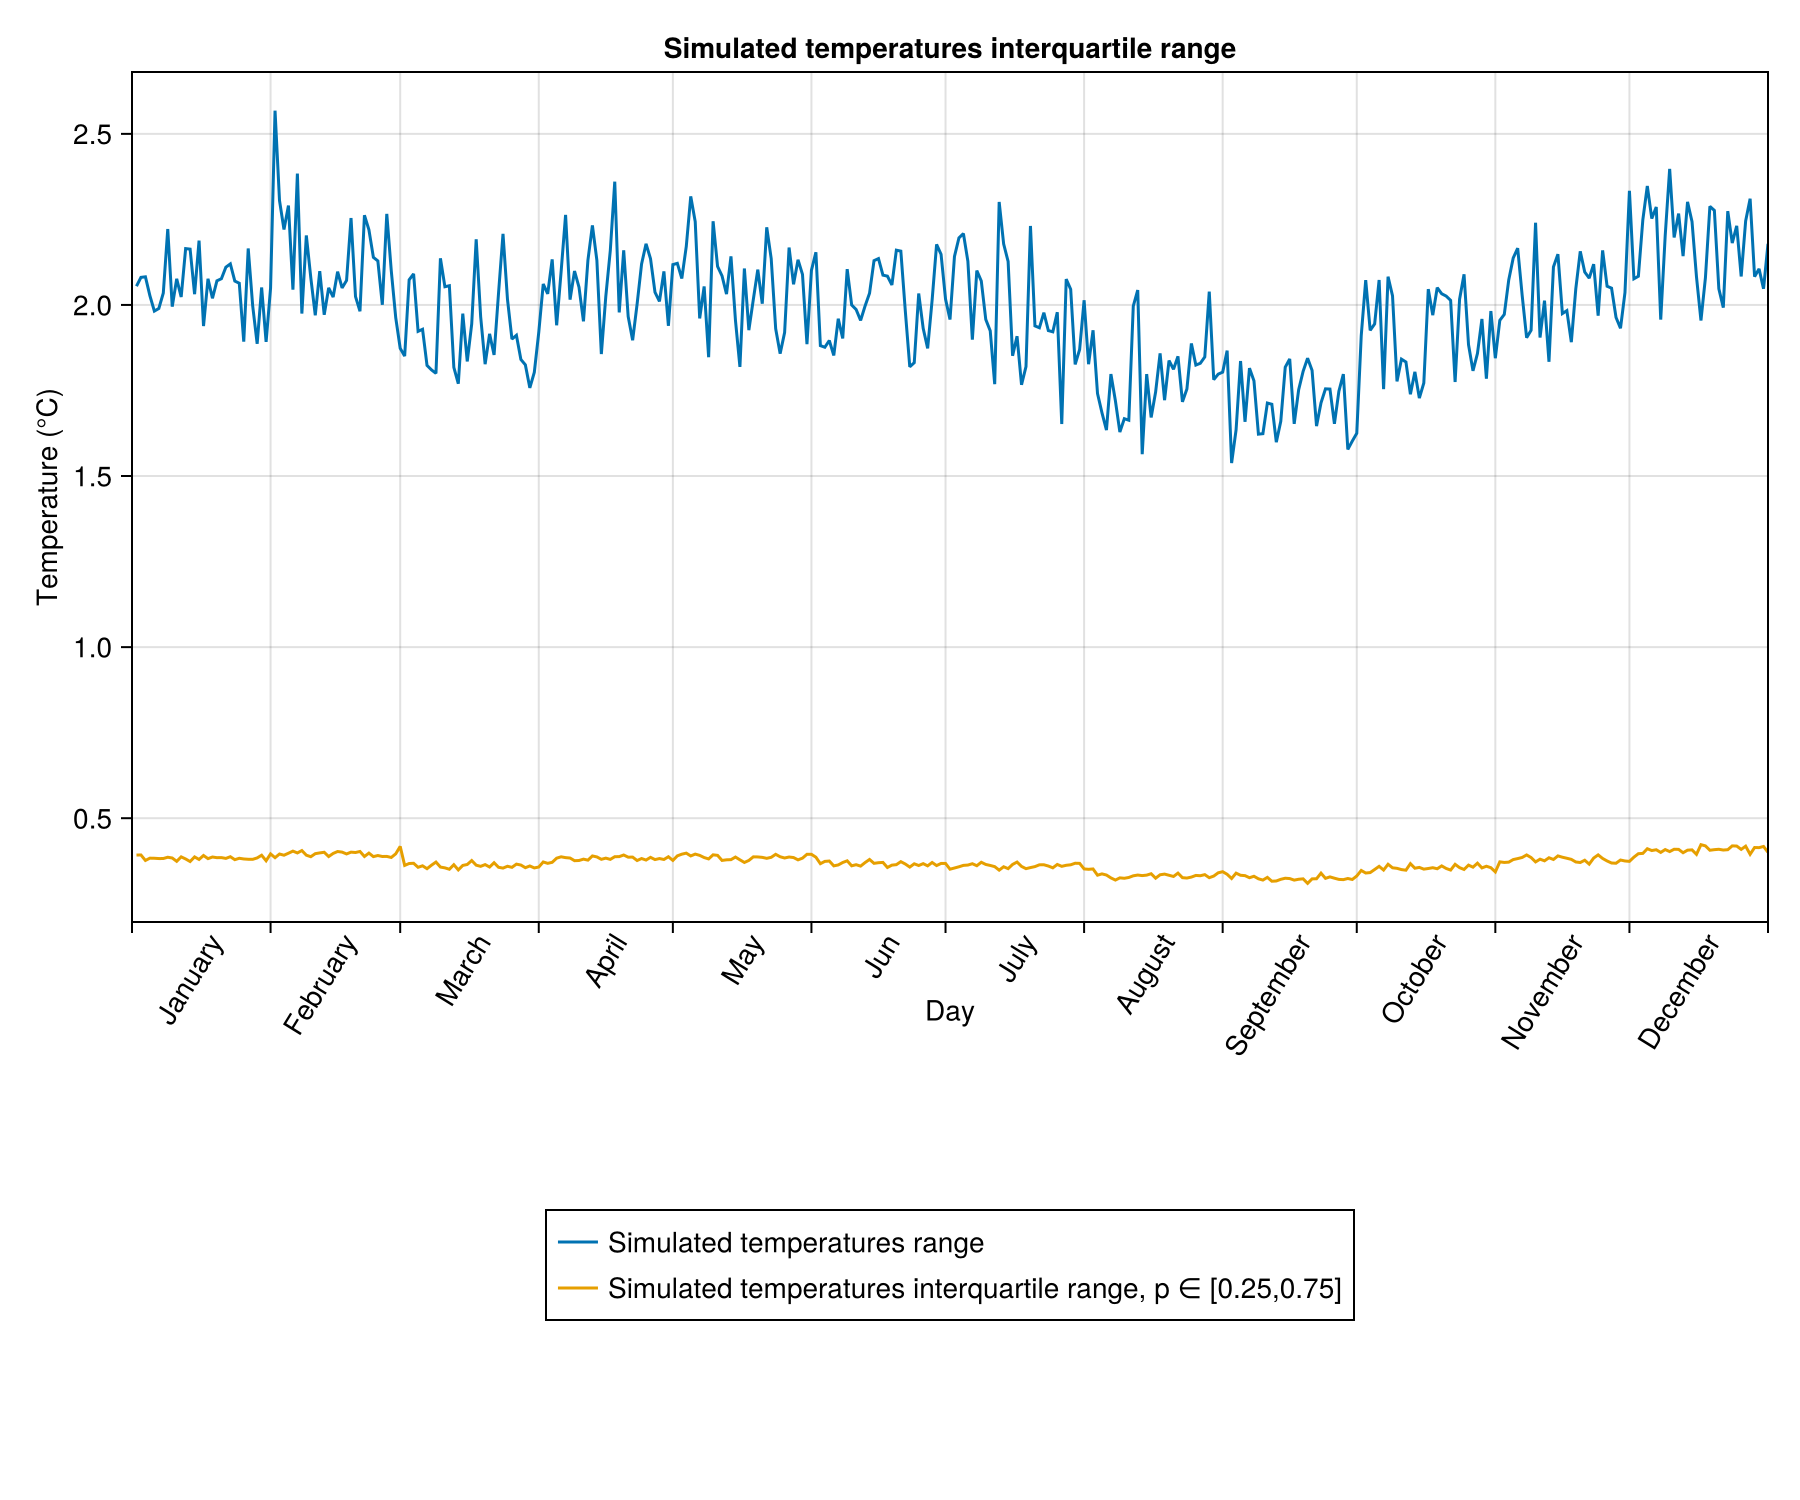

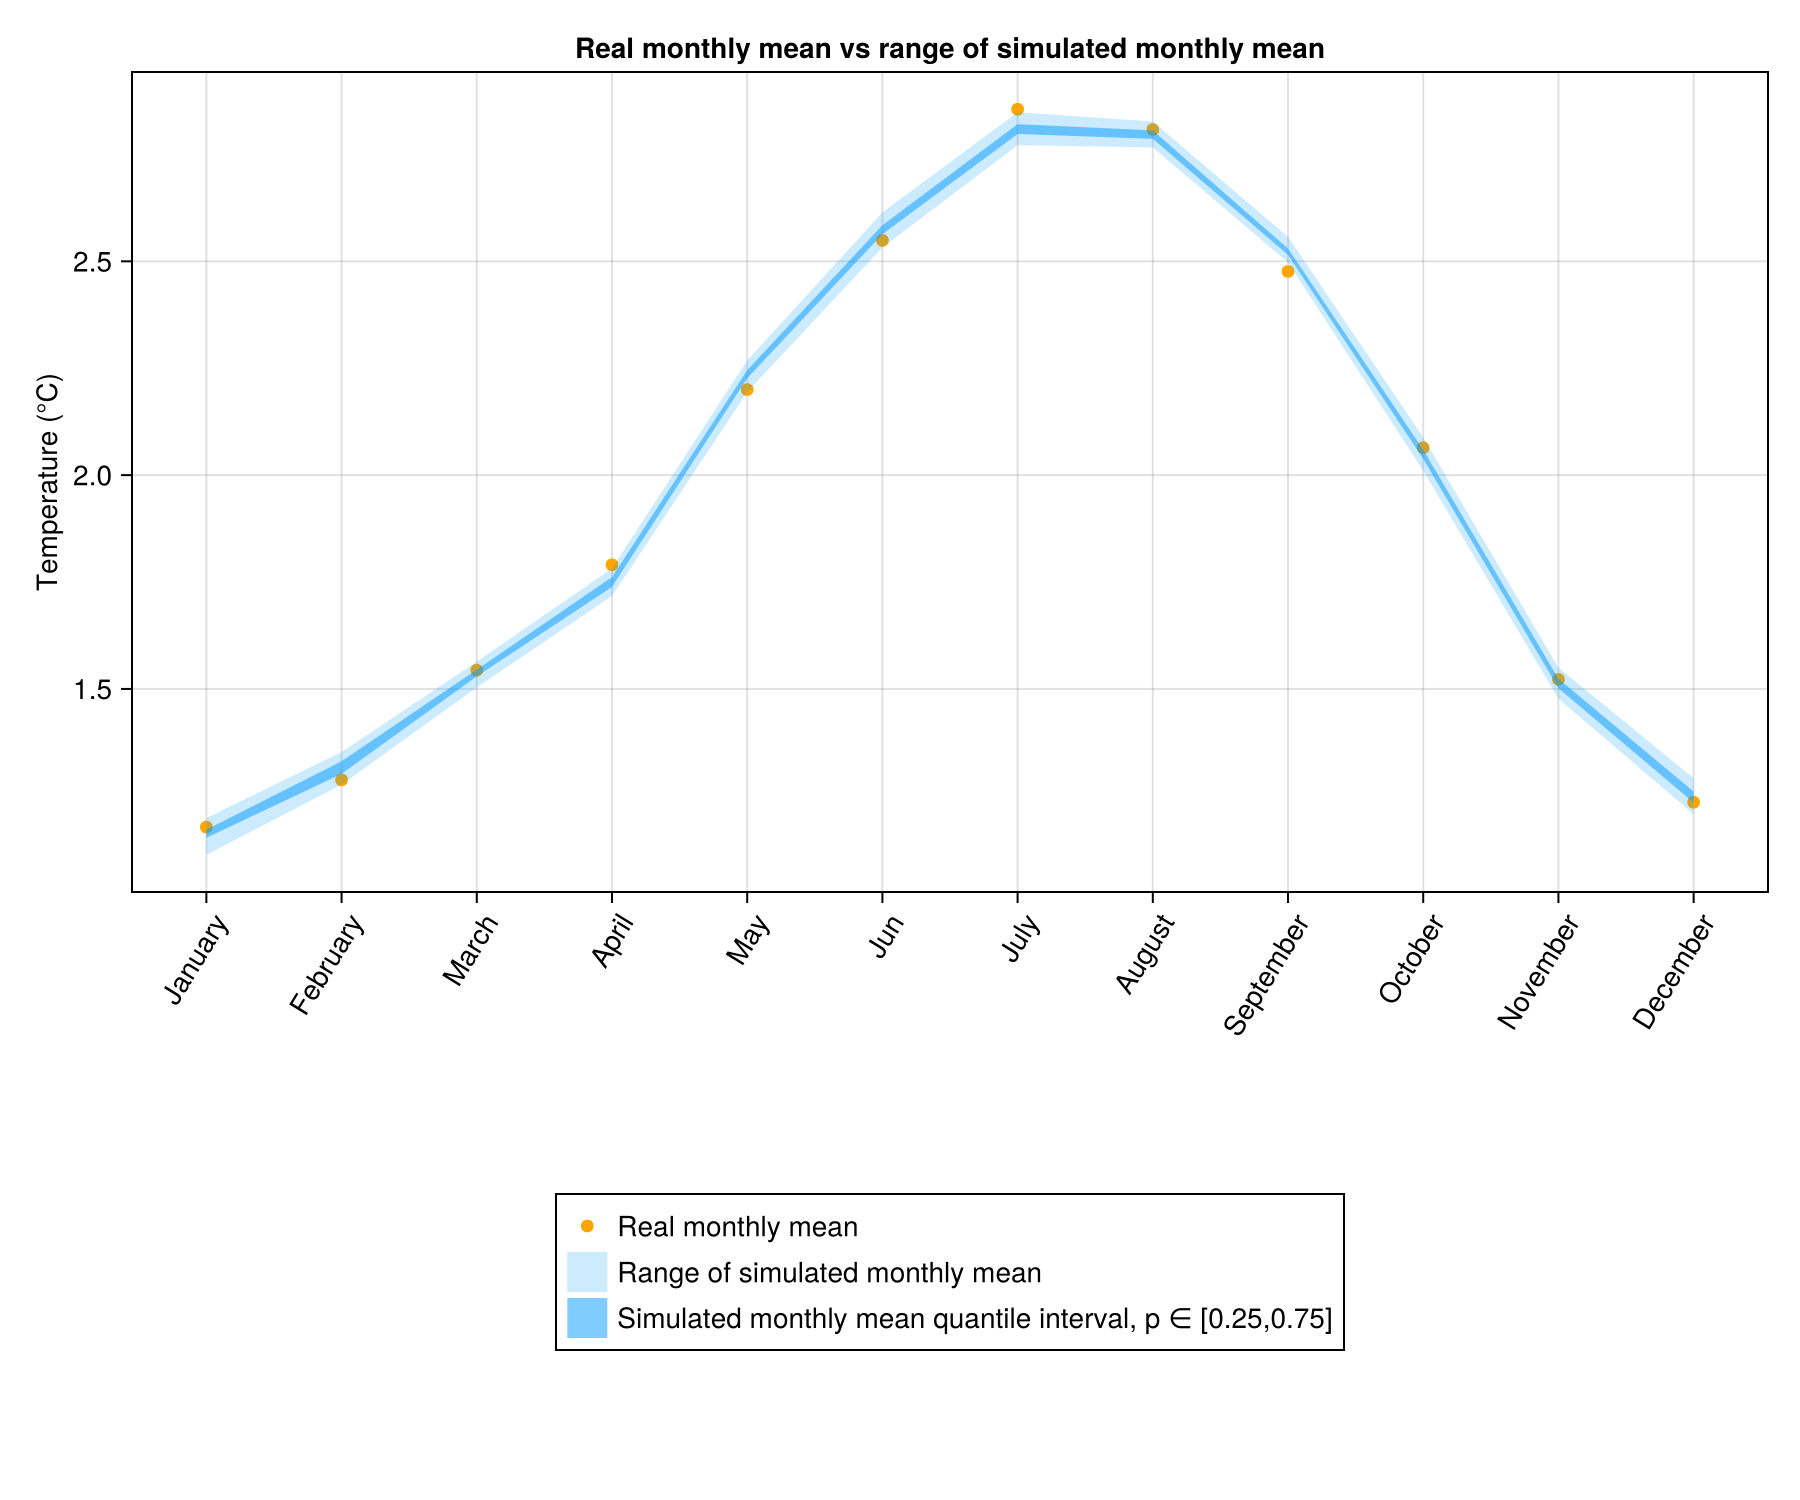

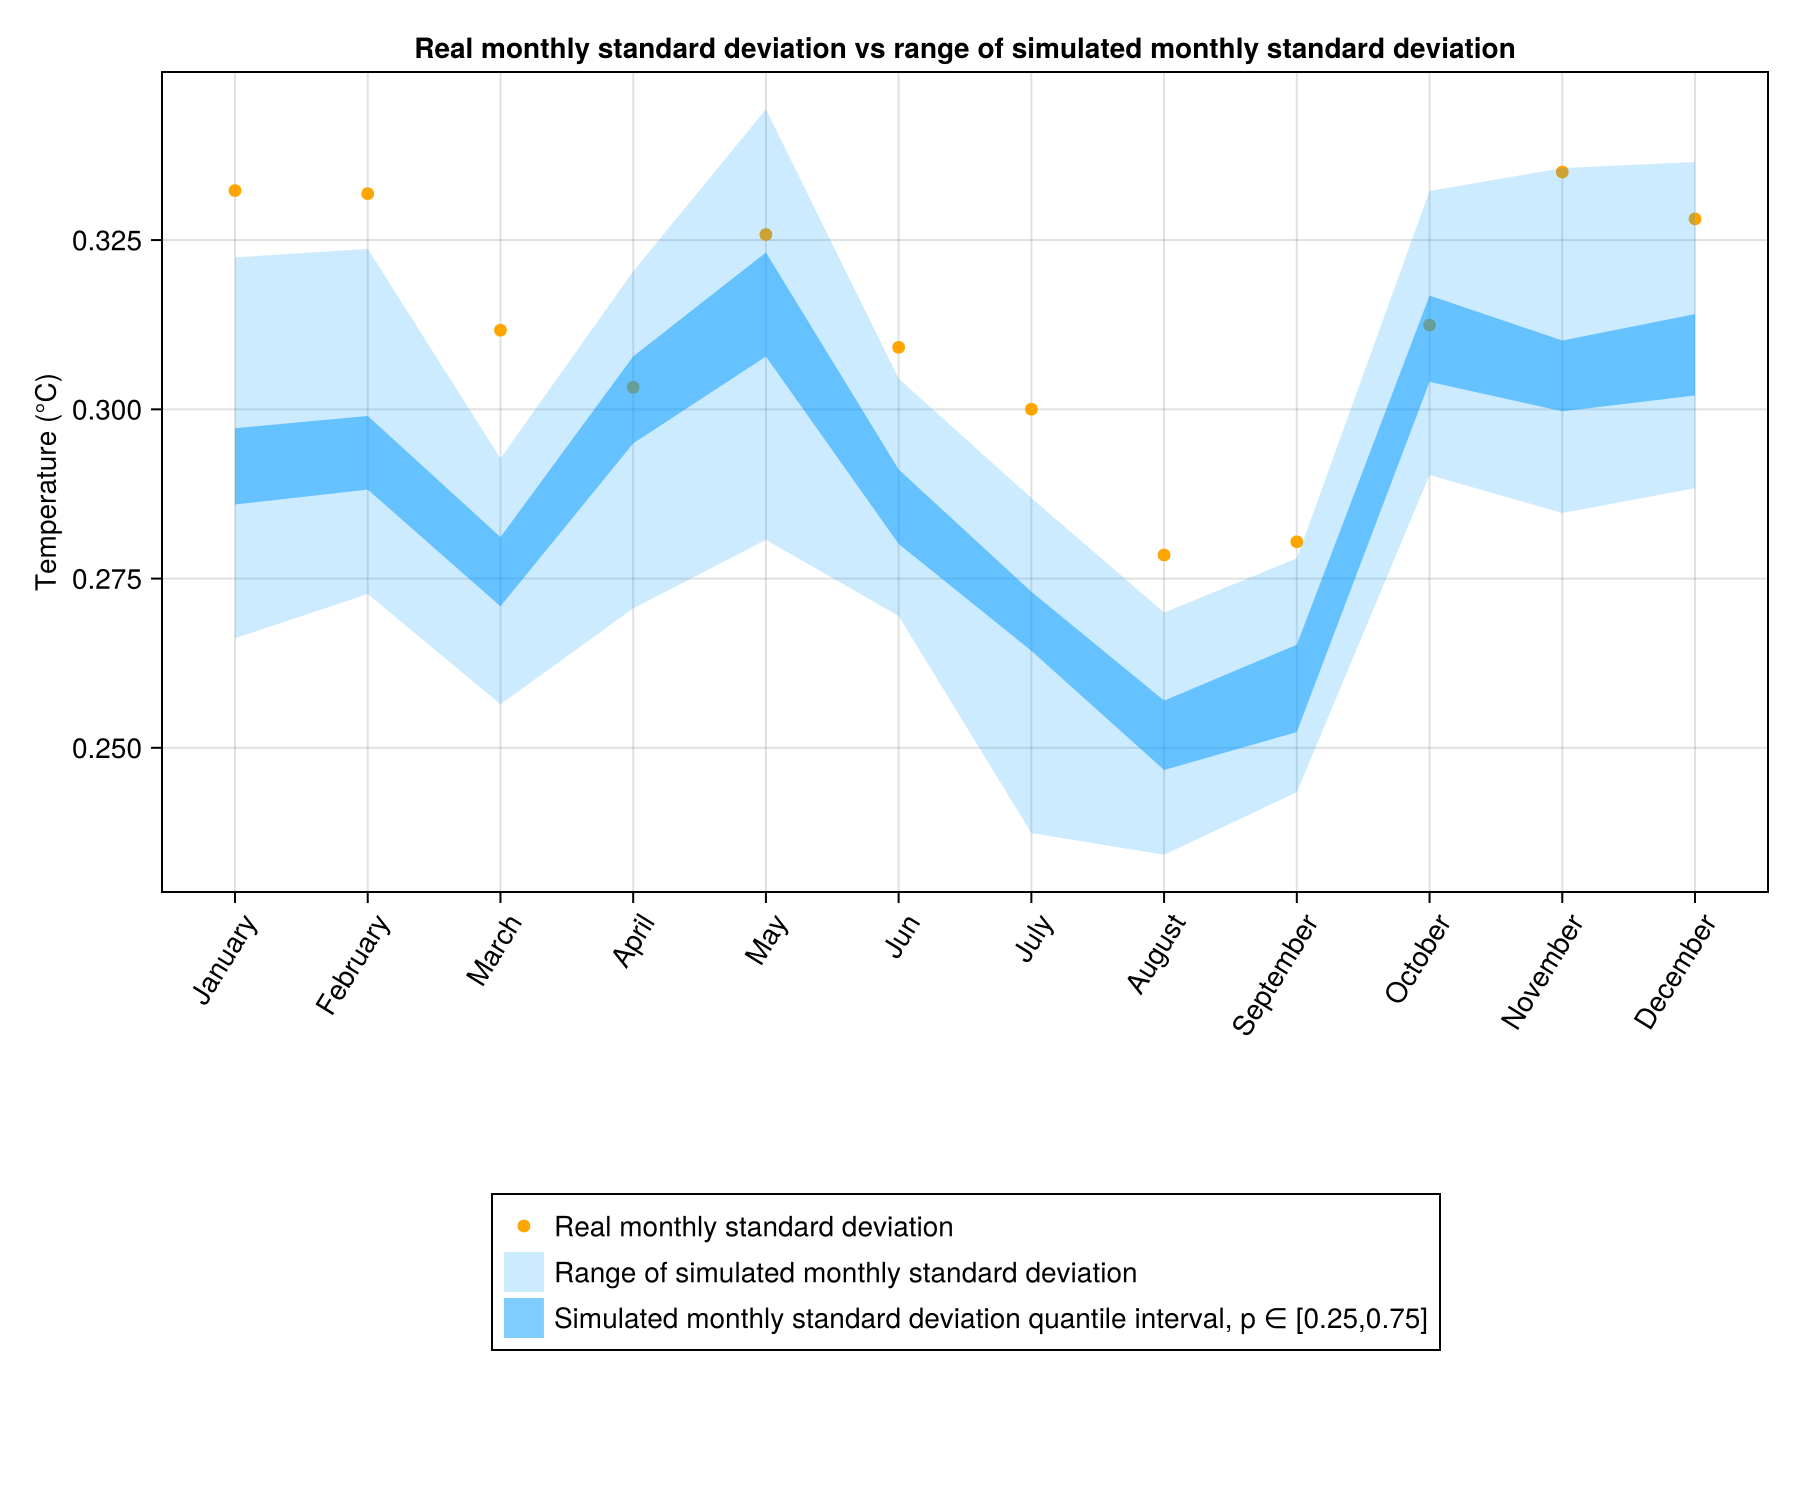

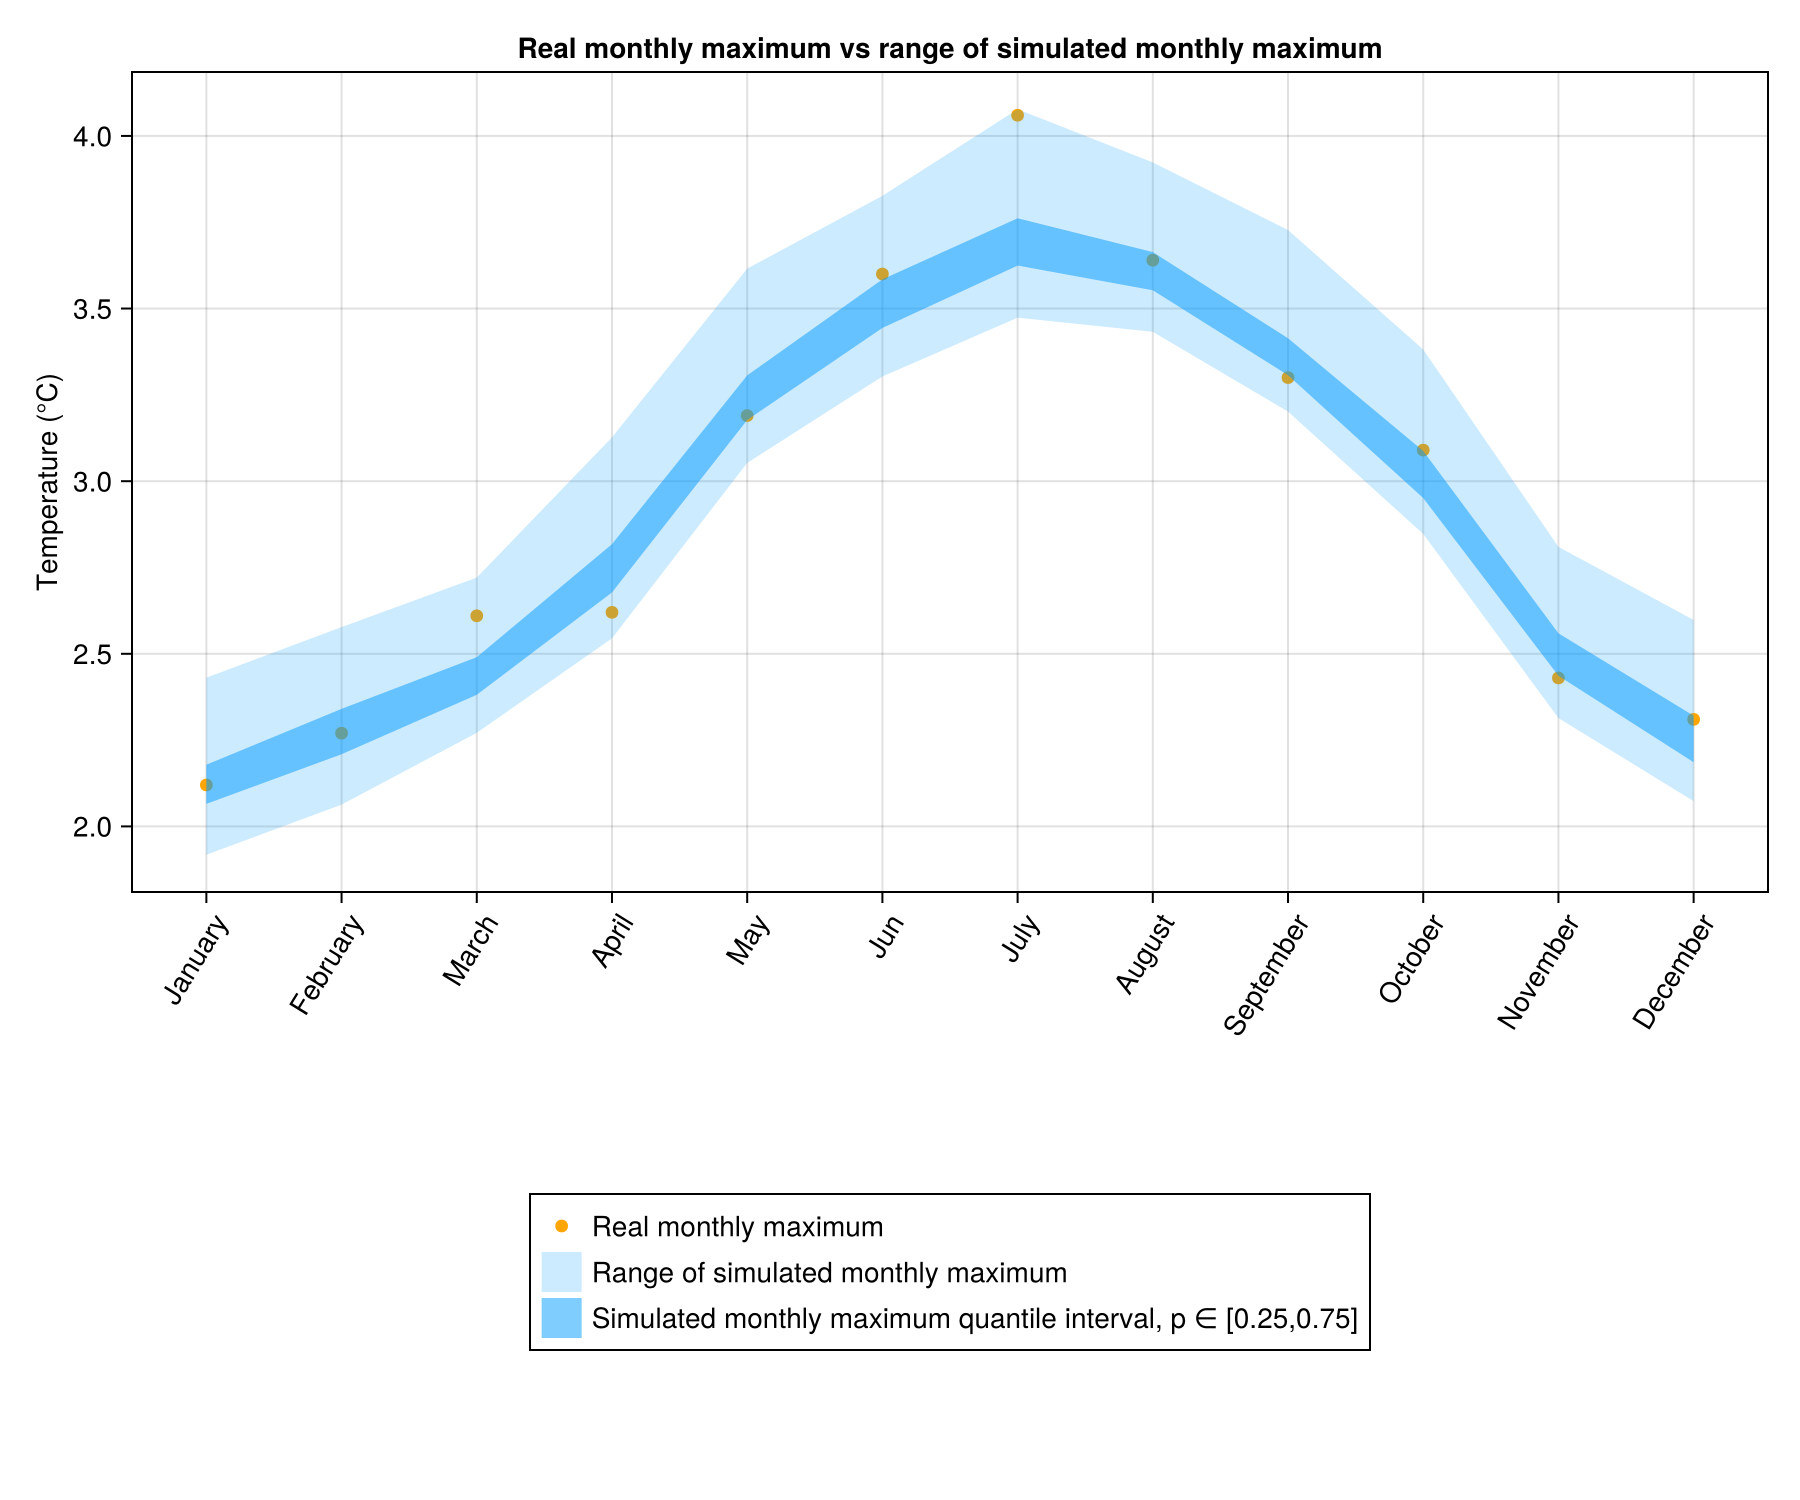

(CairoMakie.Screen{CairoMakie.IMAGE}(Scene (900px, 750px):
  0 Plots
  2 Child Scenes:
    ├ Scene (900px, 750px)
    └ Scene (900px, 750px), Cairo.CairoSurfaceImage{ColorTypes.ARGB32}(Ptr{Nothing} @0x00000295bb003e80, 1800.0, 1500.0, ColorTypes.ARGB32[ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); … ; ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8)]), Cairo.CairoContext(Ptr{Nothing} @0x000002

In [7]:
include("utils/Simulation.jl")
include("utils/Plotting.jl")
Φ_month_mean, σ_month_mean = TakeParameters(Params, "mean")
sample_ = SimulateScenarios(Monthly_temp[1][1][1], series.DATE[1]:series.DATE[end], Φ_month_mean, σ_month_mean, period, n=100)
year_sample = GatherYearScenarios(sample_, series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period, mean.(year_sample)], ["Periodicity estimation", "Mean simulated temperatures"], "Average daily temperature during a year (centered)"))
display(PlotYearCurves([period, avg_day, max_day],
    ["Periodicity estimation", "Average recorded temperatures", "Maximum recorded temperatures", "Simulated temperatures range", "Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
    "Average daily temperature during a year (centered)",
    [(minimum.(year_sample), maximum.(year_sample)), (quantile.(year_sample, 0.25), quantile.(year_sample, 0.75))],
    [("#009bff", 0.2), ("#009bff", 0.5)],
    colors=["blue", "orange", "red"]
))
display(PlotYearCurves([maximum.(year_sample) .- minimum.(year_sample), quantile.(year_sample, 0.75) .- quantile.(year_sample, 0.25)],
    ["Simulated temperatures range", "Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
    "Simulated temperatures interquartile range"
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))

We see clearly that interquartile range is shorter during summer and larger during winter.

### With months concatanation

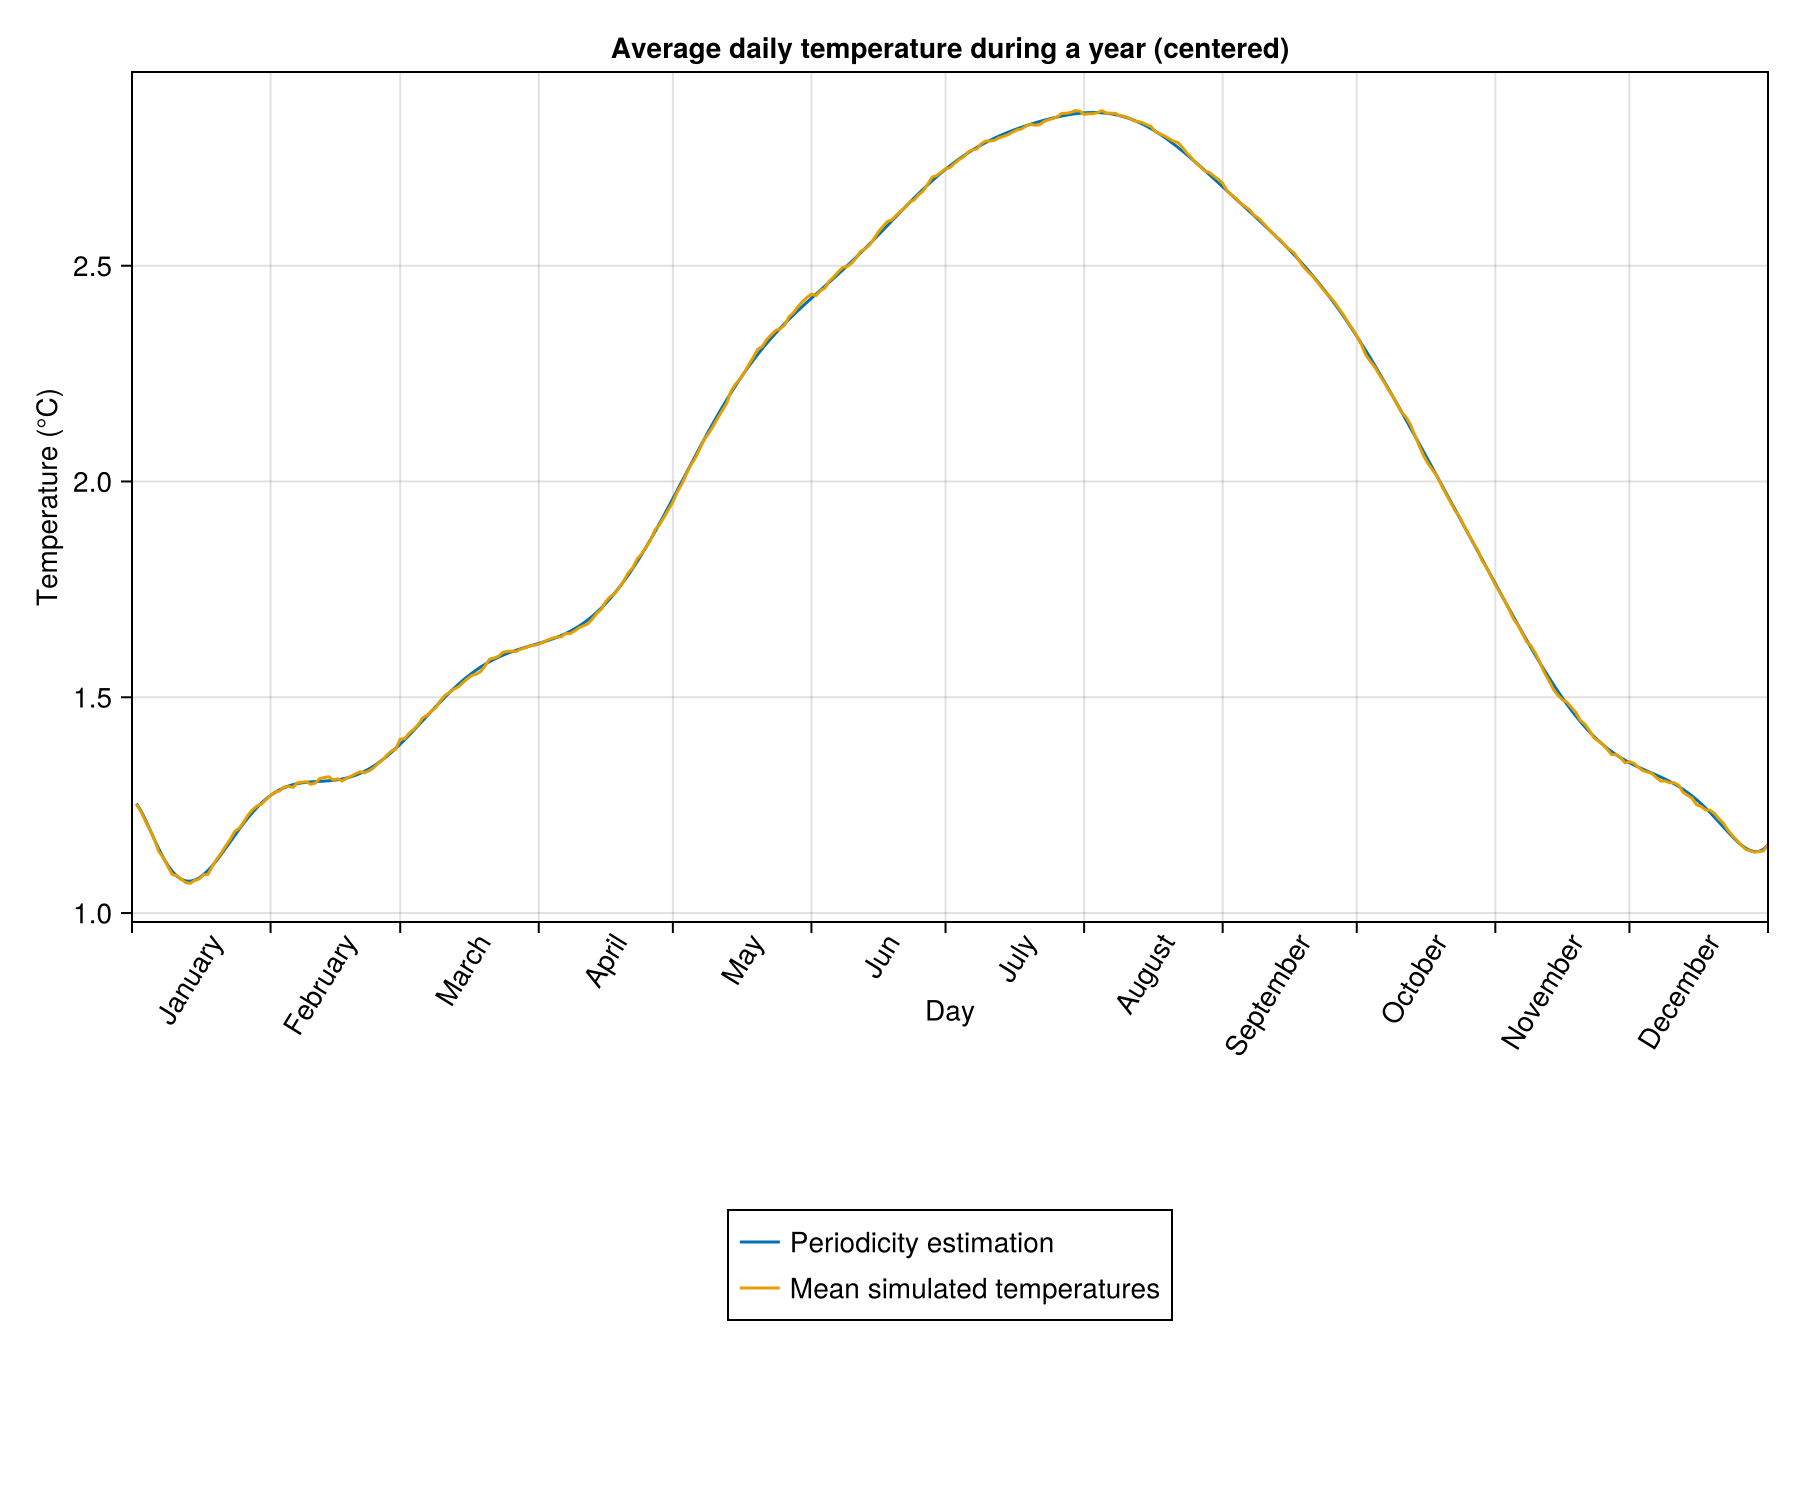

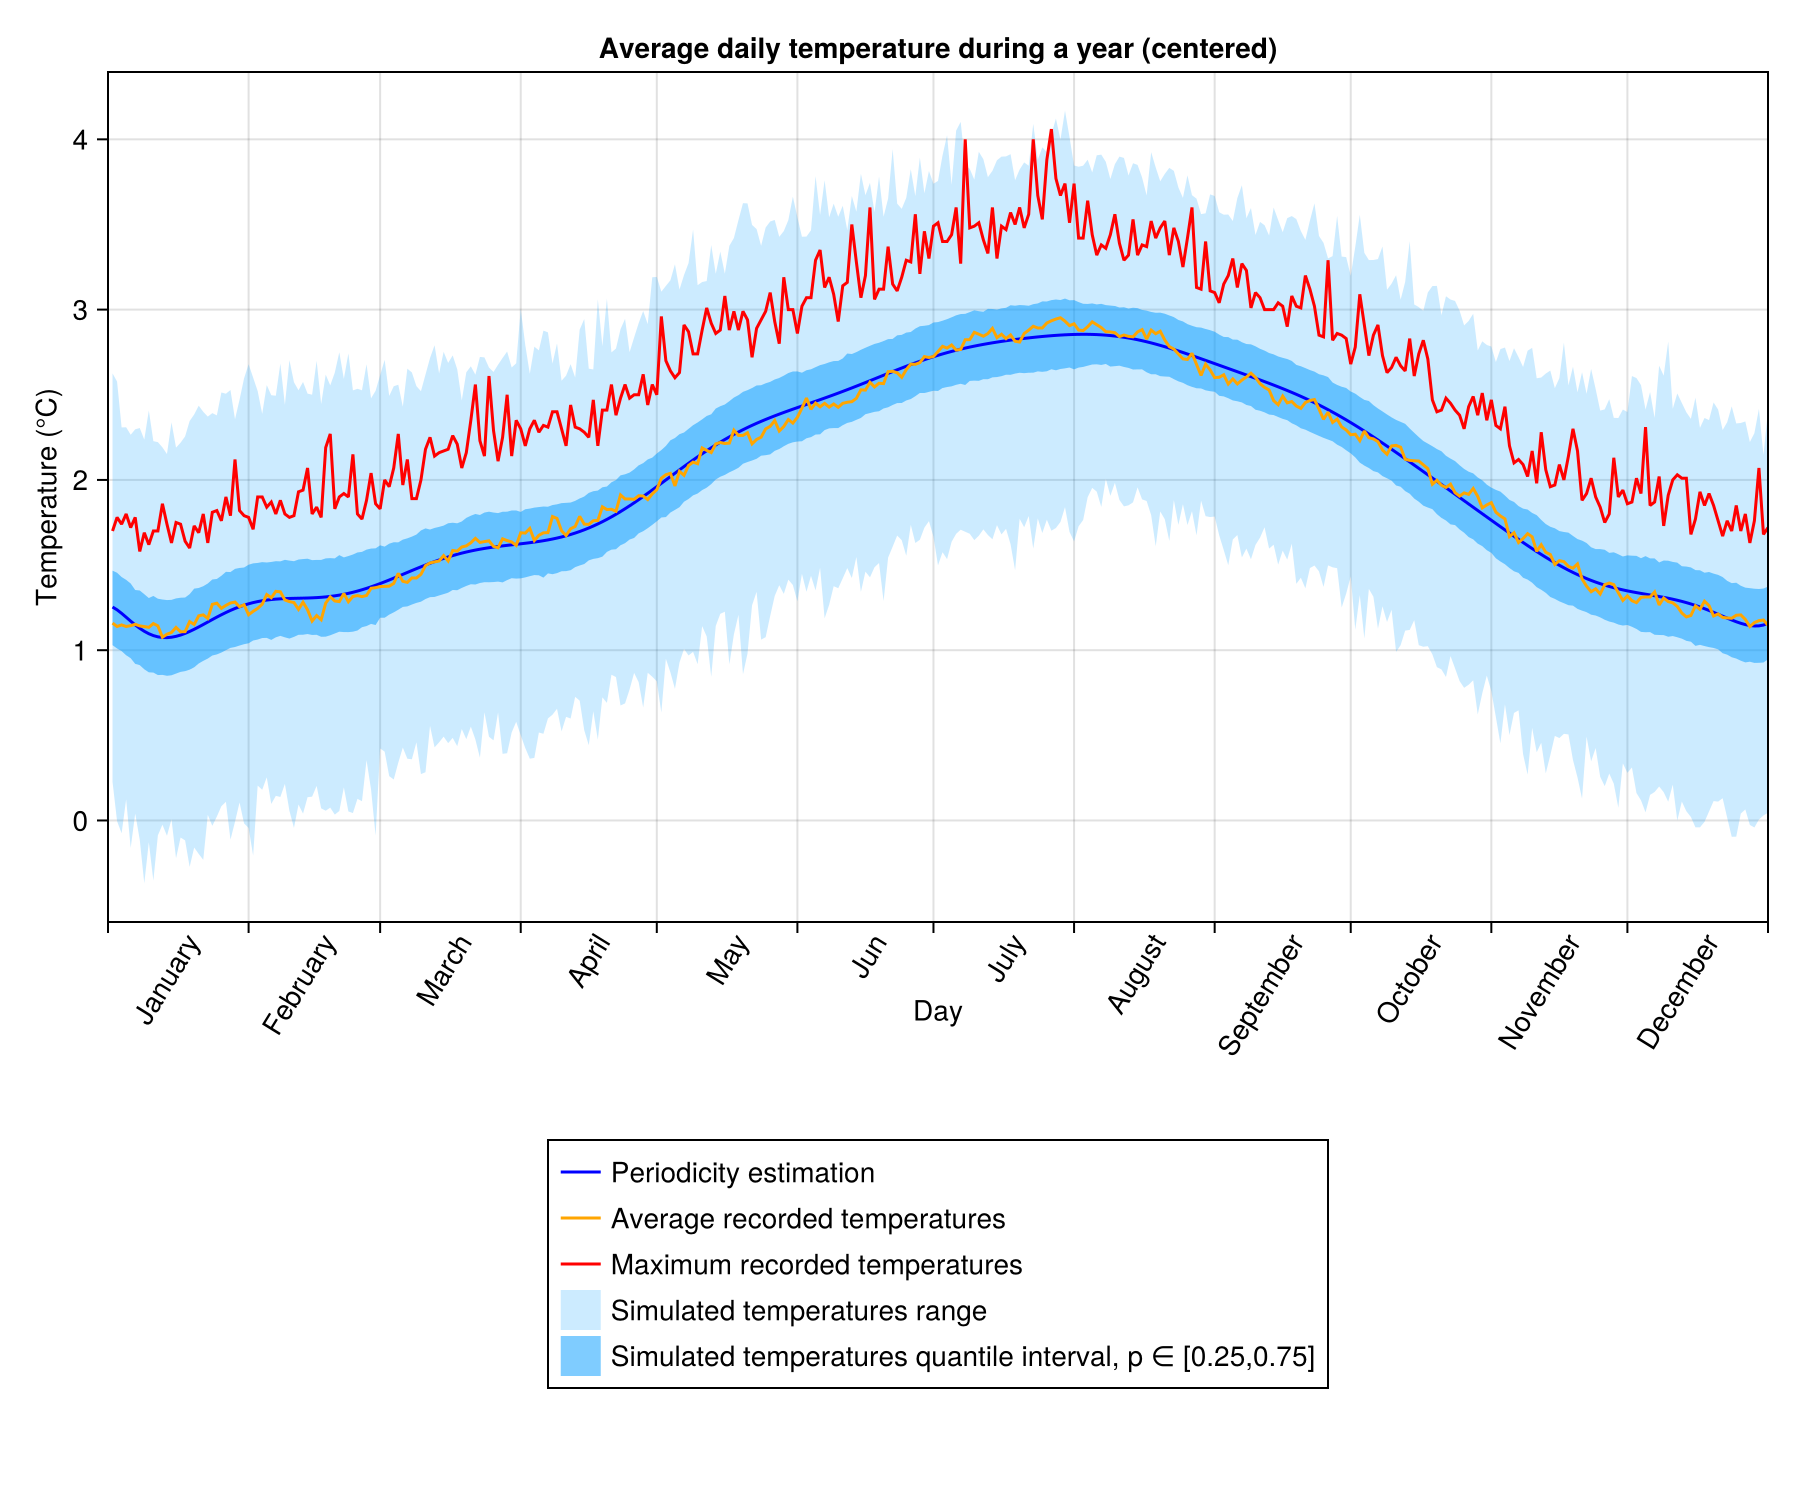

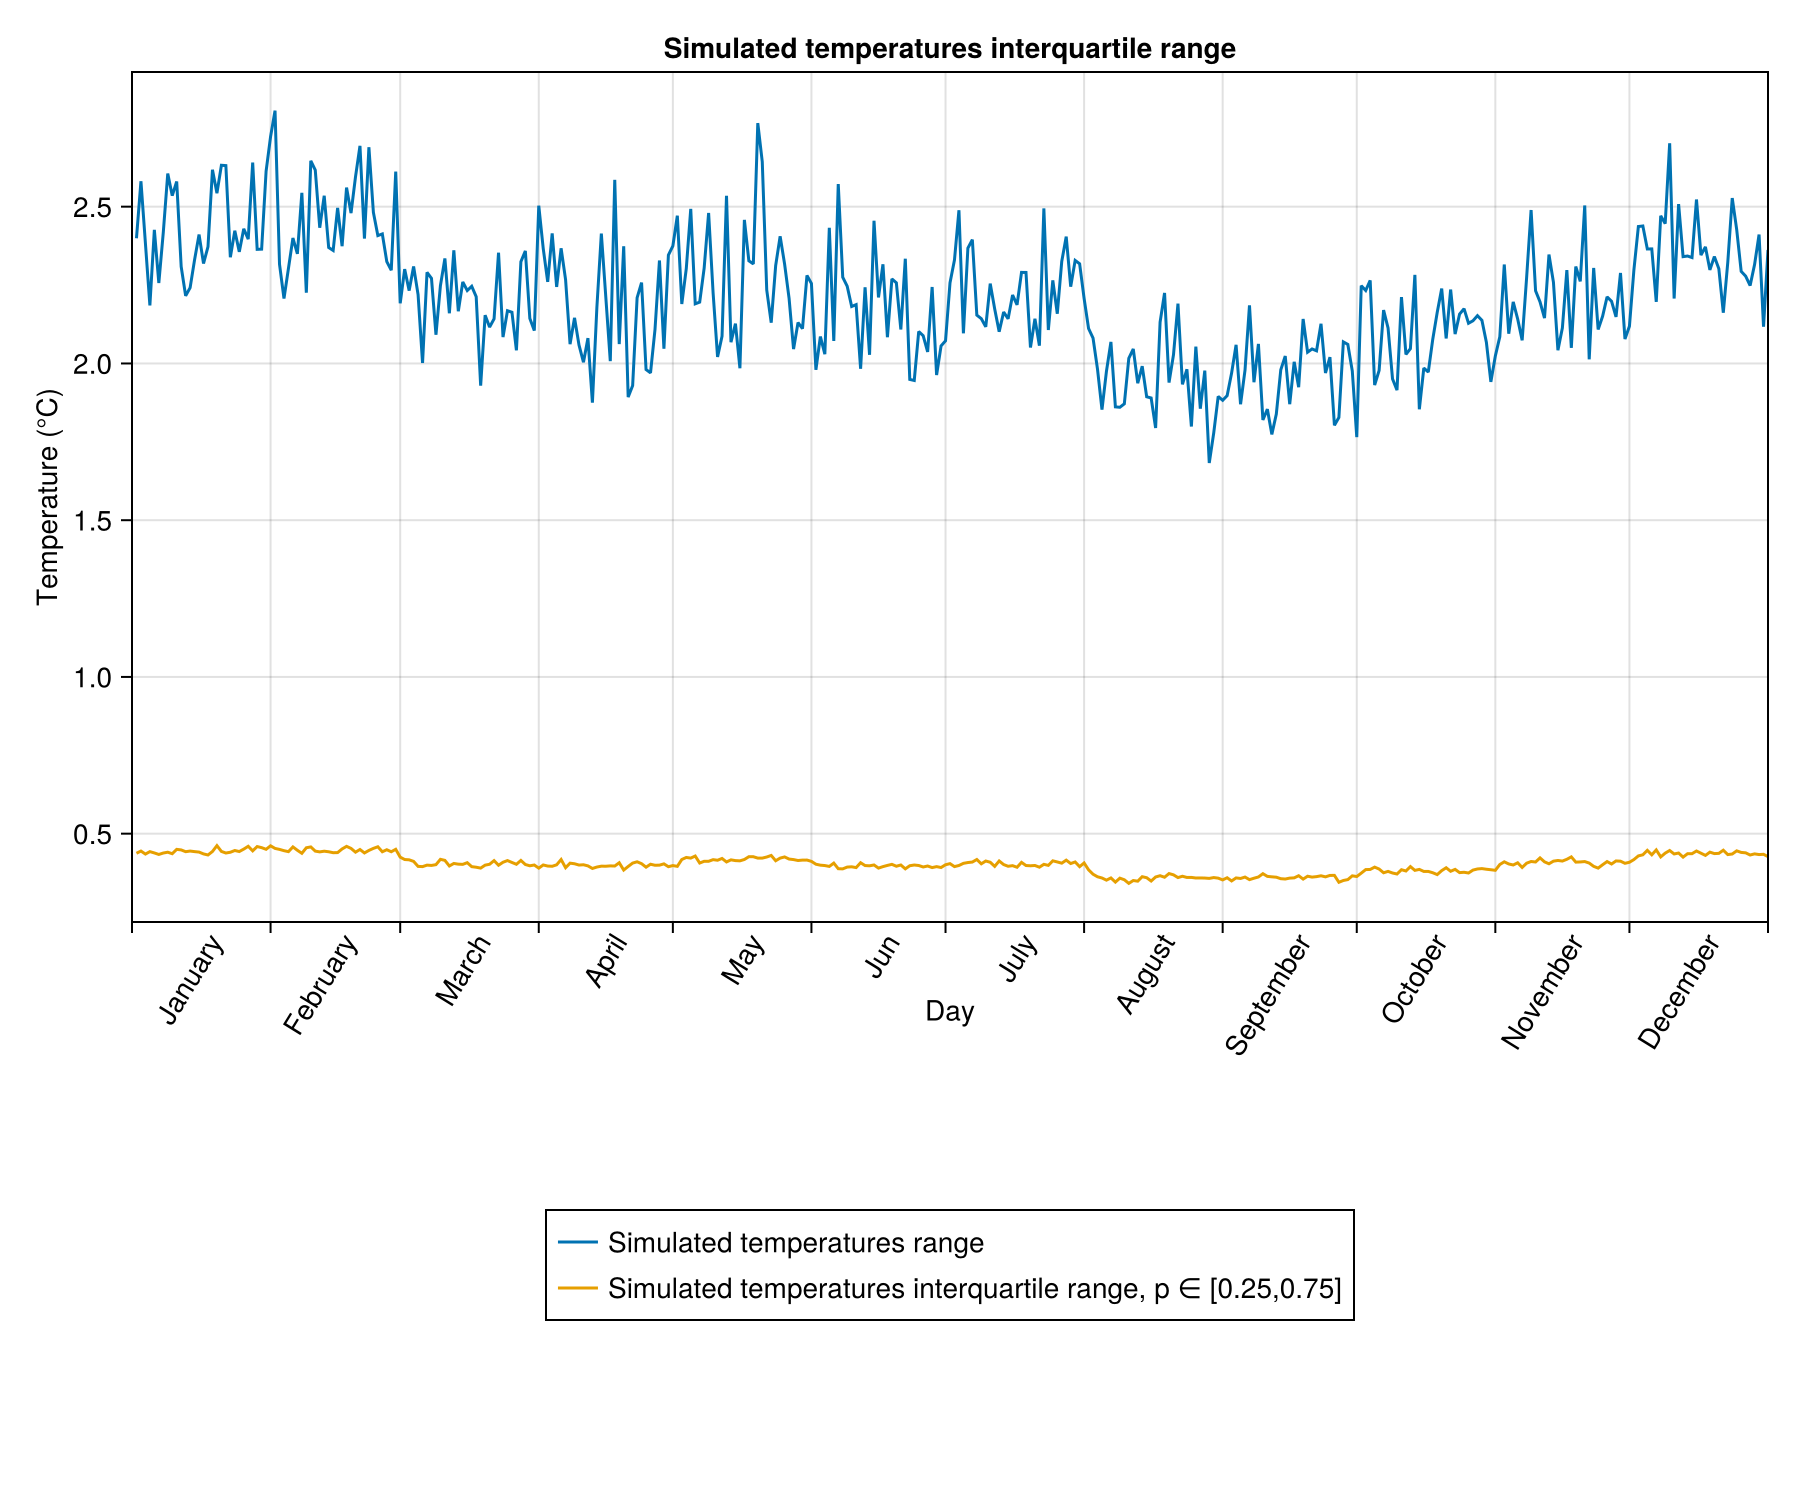

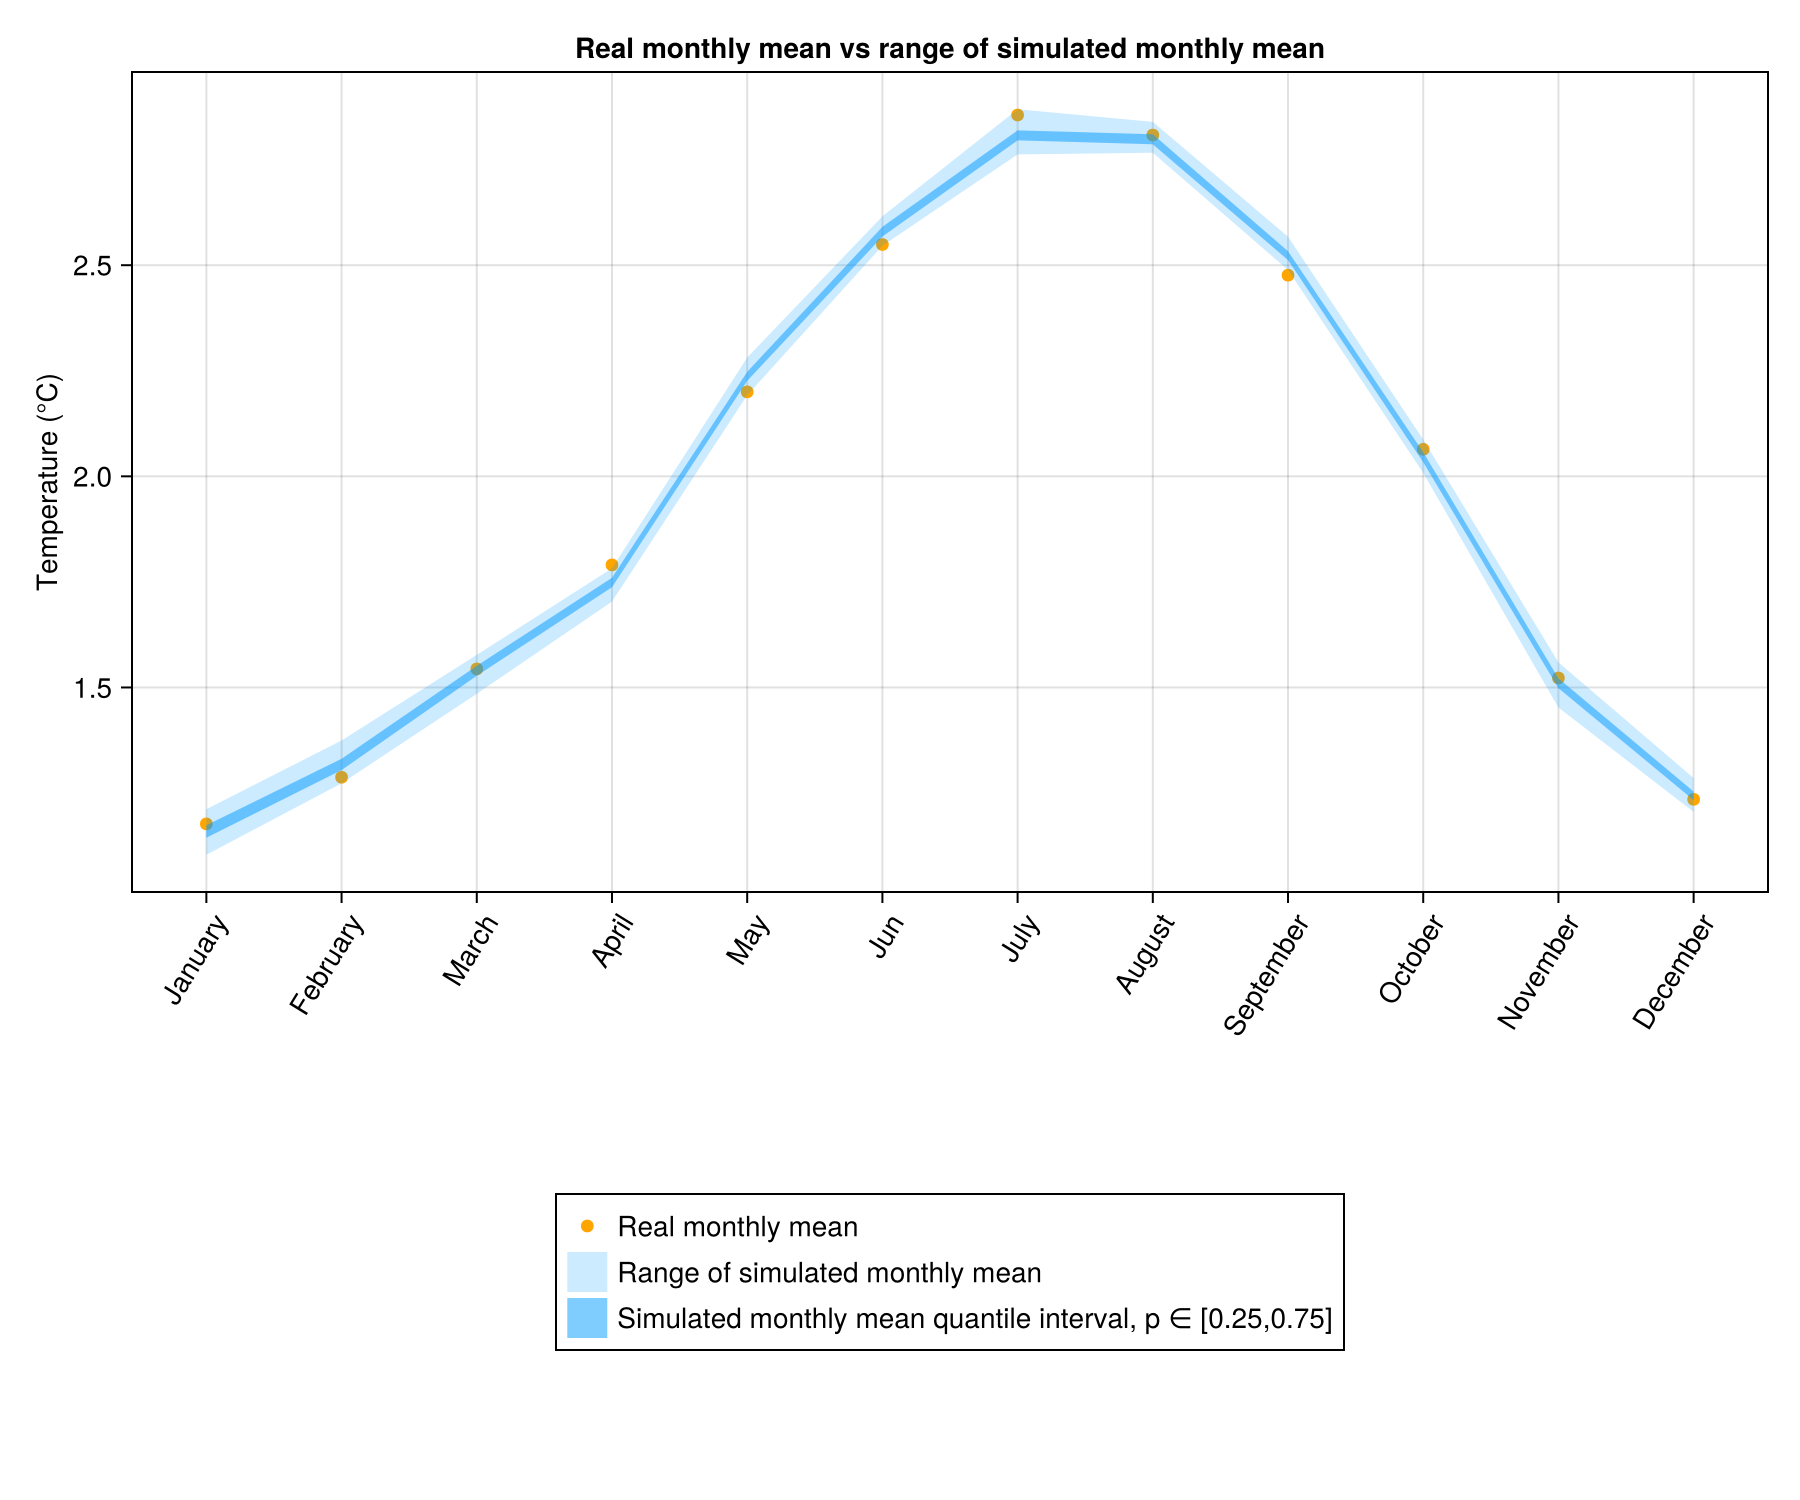

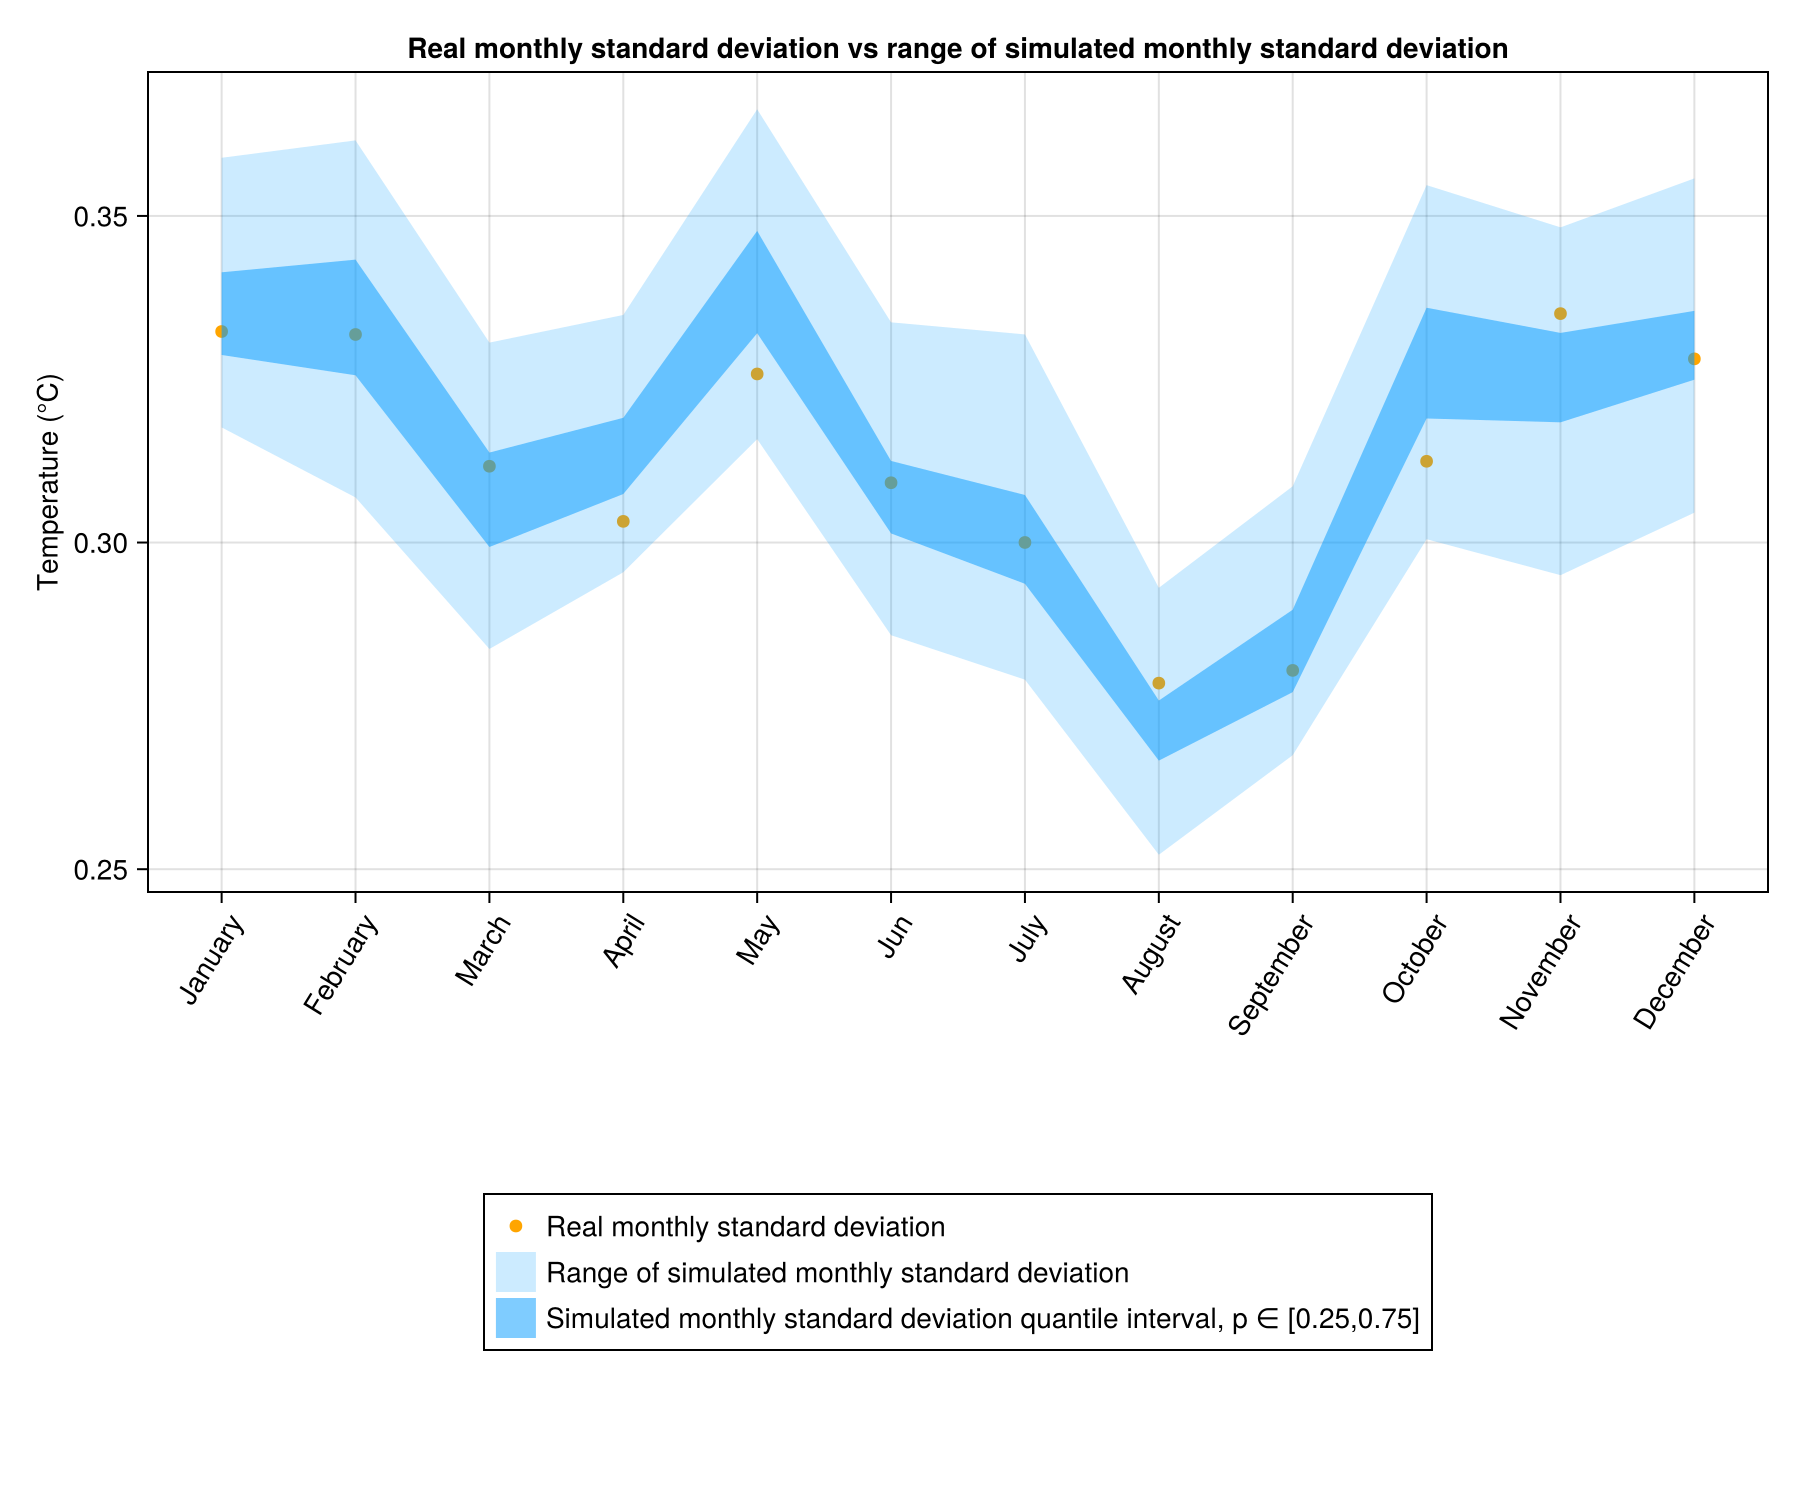

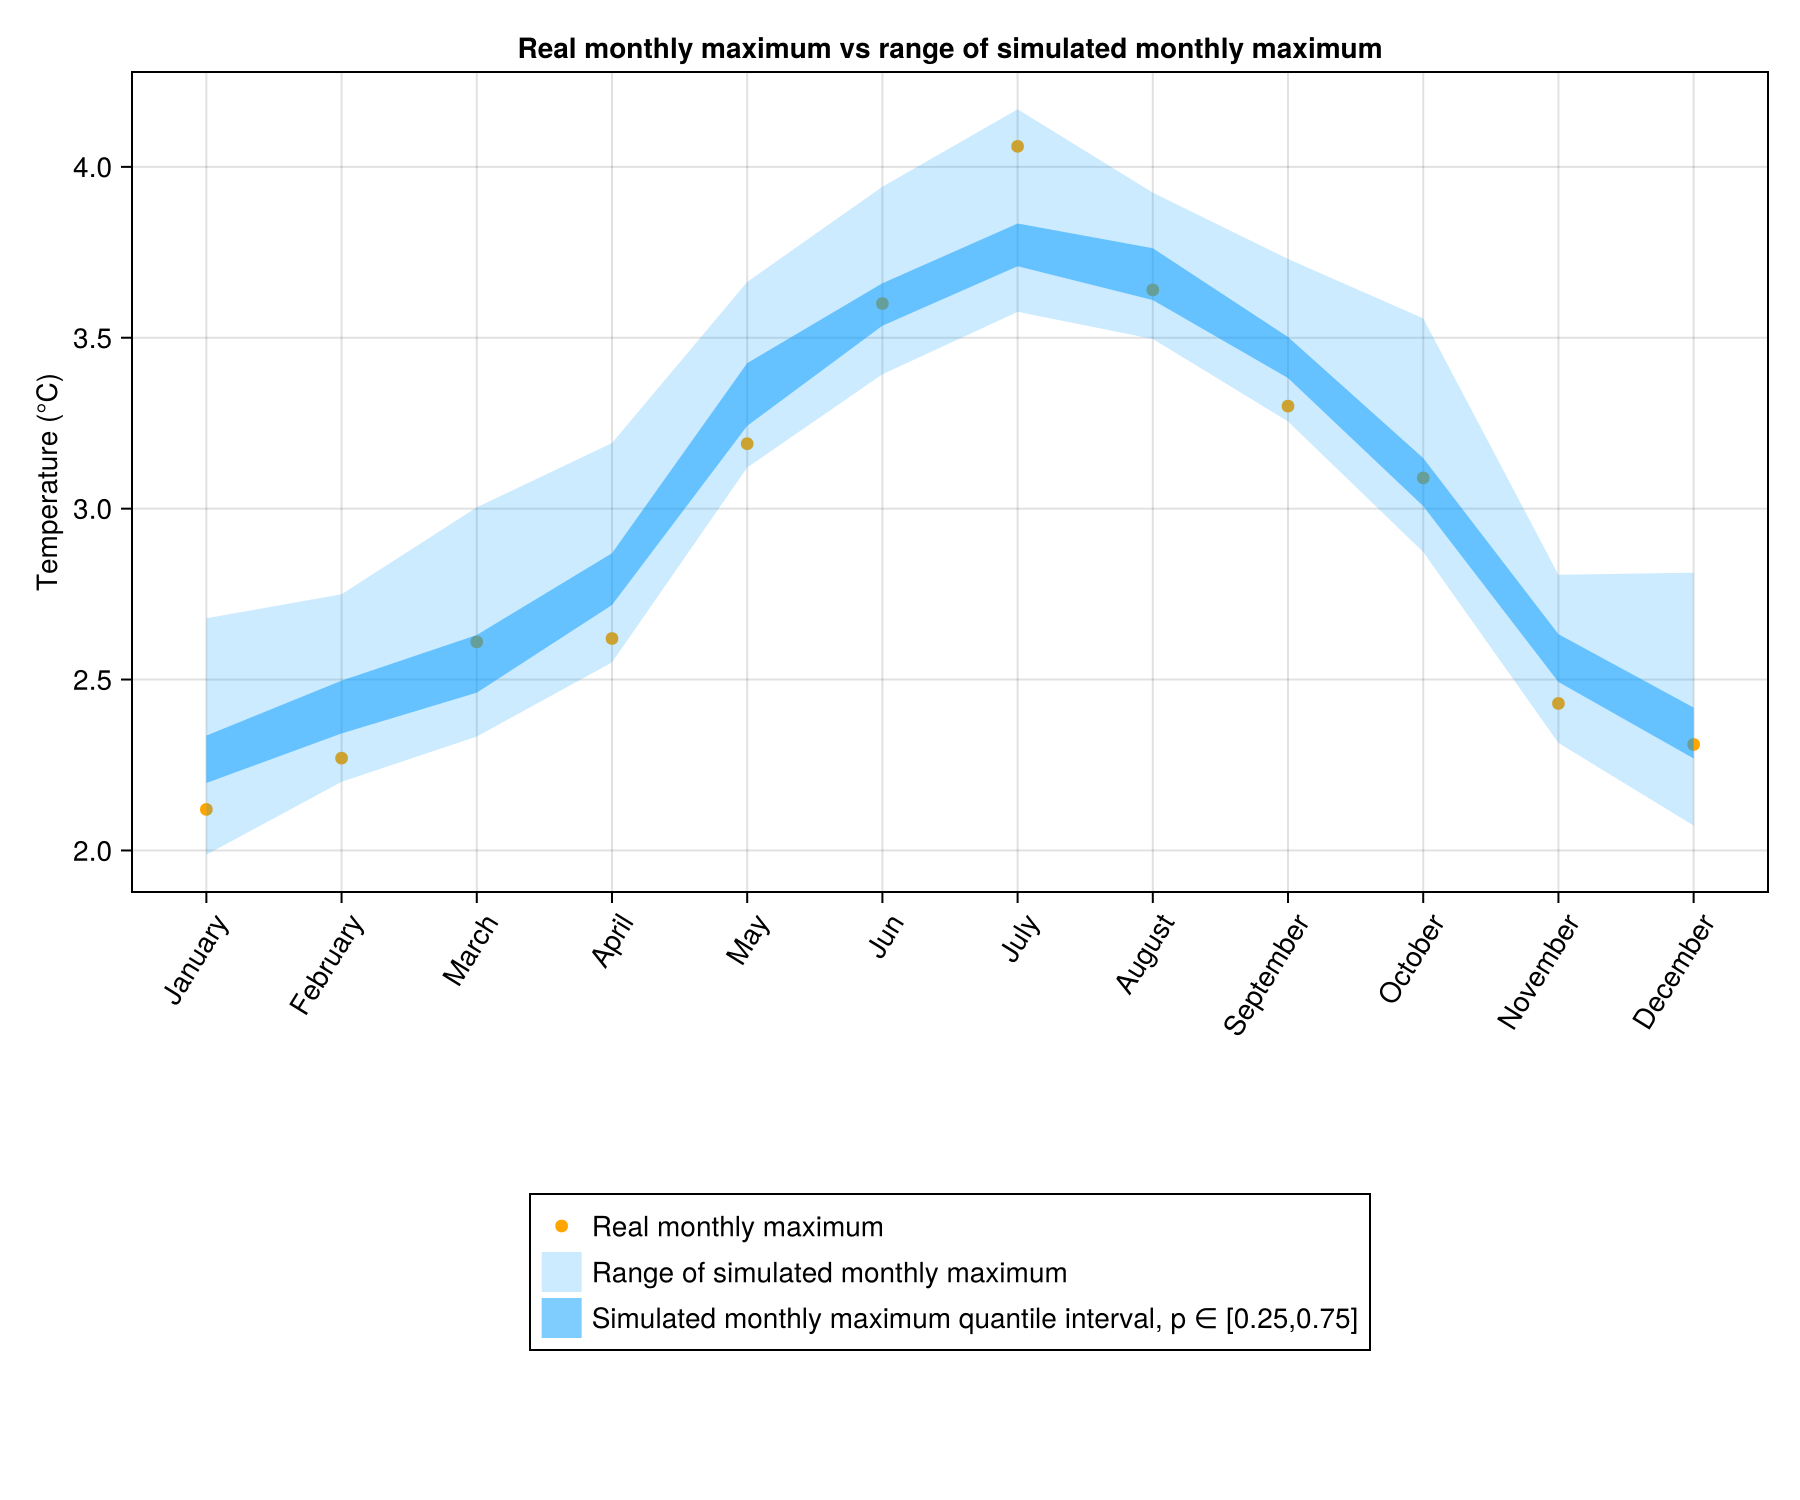

(CairoMakie.Screen{CairoMakie.IMAGE}(Scene (900px, 750px):
  0 Plots
  2 Child Scenes:
    ├ Scene (900px, 750px)
    └ Scene (900px, 750px), Cairo.CairoSurfaceImage{ColorTypes.ARGB32}(Ptr{Nothing} @0x0000029588f44e70, 1800.0, 1500.0, ColorTypes.ARGB32[ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); … ; ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8)]), Cairo.CairoContext(Ptr{Nothing} @0x000002

In [8]:
include("utils/Simulation.jl")
Φ_month_mean,σ_month_mean=TakeParameters(Params,"concat")
sample_ = SimulateScenarios(Monthly_temp[1][1][1],series.DATE[1]:series.DATE[end],Φ_month_mean,σ_month_mean,period,n=100)
year_sample = GatherYearScenarios(sample_,series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period,mean.(year_sample)],["Periodicity estimation","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves([period,avg_day,max_day],
["Periodicity estimation","Average recorded temperatures","Maximum recorded temperatures","Simulated temperatures range","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(minimum.(year_sample),maximum.(year_sample)),(quantile.(year_sample,0.25),quantile.(year_sample,0.75))],
[("#009bff",0.2),("#009bff",0.5)],
colors=["blue","orange","red"]
))
display(PlotYearCurves([maximum.(year_sample) .- minimum.(year_sample) , quantile.(year_sample,0.75) .- quantile.(year_sample,0.25)],
["Simulated temperatures range" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))

### With sum of likelihoods

In [ ]:
include("utils/Simulation.jl")
Φ_month_mean,σ_month_mean=TakeParameters(Params,"sumLL")
sample_ = SimulateScenarios(Monthly_temp[1][1][1],series.DATE[1]:series.DATE[end],Φ_month_mean,σ_month_mean,period,n=100)
year_sample = GatherYearScenarios(sample_,series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period,mean.(year_sample)],["Periodicity estimation","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves([period,avg_day,max_day],
["Periodicity estimation","Average recorded temperatures","Maximum recorded temperatures","Simulated temperatures range","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(minimum.(year_sample),maximum.(year_sample)),(quantile.(year_sample,0.25),quantile.(year_sample,0.75))],
[("#009bff",0.2),("#009bff",0.5)],
colors=["blue","orange","red"]
))
display(PlotYearCurves([maximum.(year_sample) .- minimum.(year_sample) , quantile.(year_sample,0.75) .- quantile.(year_sample,0.25)],
["Simulated temperatures range" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))

# Estimation AR(2)

## Estimation

In [ ]:
include(raw"utils\Estimation.jl")
Params, figure= AllEstimation(Monthly_temp, 2, lineplot=true)
display(figure)

## Simulation

### With estimation on each month

In [ ]:
include("utils/Simulation.jl")
Φ_month_mean,σ_month_mean=TakeParameters(Params,"mean")
sample_ = SimulateScenarios(Monthly_temp[1][1][1:2],series.DATE[1]:series.DATE[end],Φ_month_mean,σ_month_mean,period,n=100)
year_sample = GatherYearScenarios(sample_,series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period,mean.(year_sample)],["Periodicity estimation","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves([period,avg_day,max_day],
["Periodicity estimation","Average recorded temperatures","Maximum recorded temperatures","Simulated temperatures range","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(minimum.(year_sample),maximum.(year_sample)),(quantile.(year_sample,0.25),quantile.(year_sample,0.75))],
[("#009bff",0.2),("#009bff",0.5)],
colors=["blue","orange","red"]
))
display(PlotYearCurves([maximum.(year_sample) .- minimum.(year_sample) , quantile.(year_sample,0.75) .- quantile.(year_sample,0.25)],
["Simulated temperatures range" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))

We see clearly that interquartile range is shorter during summer and larger during winter.

### With months concatanation

In [ ]:
include("utils/Simulation.jl")
Φ_month_mean,σ_month_mean=TakeParameters(Params,"concat")
sample_ = SimulateScenarios(Monthly_temp[1][1][1:2],series.DATE[1]:series.DATE[end],Φ_month_mean,σ_month_mean,period,n=100)
year_sample = GatherYearScenarios(sample_,series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period,mean.(year_sample)],["Periodicity estimation","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves([period,avg_day,max_day],
["Periodicity estimation","Average recorded temperatures","Maximum recorded temperatures","Simulated temperatures range","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(minimum.(year_sample),maximum.(year_sample)),(quantile.(year_sample,0.25),quantile.(year_sample,0.75))],
[("#009bff",0.2),("#009bff",0.5)],
colors=["blue","orange","red"]
))
display(PlotYearCurves([maximum.(year_sample) .- minimum.(year_sample) , quantile.(year_sample,0.75) .- quantile.(year_sample,0.25)],
["Simulated temperatures range" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))

### With sum of likelihoods

In [ ]:
include("utils/Simulation.jl")
include("utils/Plotting.jl")
Φ_month_mean,σ_month_mean=TakeParameters(Params,"sumLL")
sample_ = SimulateScenarios(Monthly_temp[1][1][1:2],series.DATE[1]:series.DATE[end],Φ_month_mean,σ_month_mean,period,n=100)
year_sample = GatherYearScenarios(sample_,series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period,mean.(year_sample)],["Periodicity estimation","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves([period,avg_day,max_day],
["Periodicity estimation","Average recorded temperatures","Maximum recorded temperatures","Simulated temperatures range","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(minimum.(year_sample),maximum.(year_sample)),(quantile.(year_sample,0.25),quantile.(year_sample,0.75))],
[("#009bff",0.2),("#009bff",0.5)],
colors=["blue","orange","red"]
))
display(PlotYearCurves([maximum.(year_sample) .- minimum.(year_sample) , quantile.(year_sample,0.75) .- quantile.(year_sample,0.25)],
["Simulated temperatures range" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))